<a href="https://colab.research.google.com/github/zane0703/SC1015-MIni-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINI PROJECT (NBA GAME STATISTICS)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn import svm
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import graphviz
from scipy import stats
sns.set()



## Importing and cleaning of Datasets

In [ ]:
df_nba = pd.read_csv("./Dataset/games.csv")
df_nba.columns = df_nba.columns.str.replace("_"," ")
df_nba["HOME TEAM WINS"]  = df_nba["HOME TEAM WINS"].map({0: False, 1: True})
print(df_nba.dtypes)

GAME DATE EST        object
GAME ID               int64
GAME STATUS TEXT     object
HOME TEAM ID          int64
VISITOR TEAM ID       int64
SEASON                int64
TEAM ID home          int64
PTS home            float64
FG PCT home         float64
FT PCT home         float64
FG3 PCT home        float64
AST home            float64
REB home            float64
TEAM ID away          int64
PTS away            float64
FG PCT away         float64
FT PCT away         float64
FG3 PCT away        float64
AST away            float64
REB away            float64
HOME TEAM WINS         bool
dtype: object


In [ ]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME DATE EST     26651 non-null  object 
 1   GAME ID           26651 non-null  int64  
 2   GAME STATUS TEXT  26651 non-null  object 
 3   HOME TEAM ID      26651 non-null  int64  
 4   VISITOR TEAM ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM ID home      26651 non-null  int64  
 7   PTS home          26552 non-null  float64
 8   FG PCT home       26552 non-null  float64
 9   FT PCT home       26552 non-null  float64
 10  FG3 PCT home      26552 non-null  float64
 11  AST home          26552 non-null  float64
 12  REB home          26552 non-null  float64
 13  TEAM ID away      26651 non-null  int64  
 14  PTS away          26552 non-null  float64
 15  FG PCT away       26552 non-null  float64
 16  FT PCT away       26552 non-null  float6

In [ ]:
win = df_nba['HOME TEAM WINS'].to_frame()
print(win["HOME TEAM WINS"].value_counts())

True     15645
False    11006
Name: HOME TEAM WINS, dtype: int64


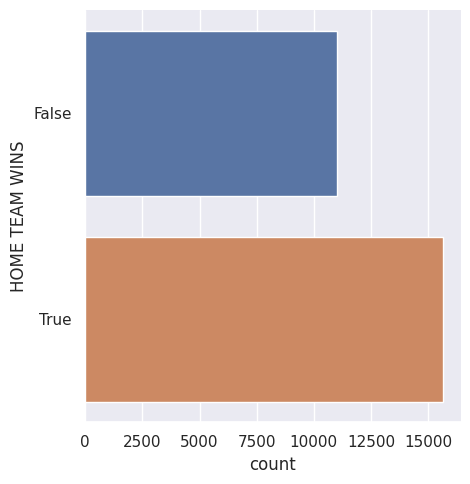

In [ ]:

sns.catplot(y = "HOME TEAM WINS", data = win, kind = "count")

As we are looking at the factors that primarily help the home team win, we will start by removing some columns from the data frame. The columns that we'll remove from the data frame are as follows: 
1. GAME DATE EST
2. GAME ID
3. GAME STATUS TEXT
4. HOME TEAM ID
5. VISITOR TEAM ID
6. SEASON
7. TEAM ID home
8. TEAM ID away

In [ ]:
cleanDF_nba=df_nba.drop(['GAME DATE EST','GAME ID', 'GAME STATUS TEXT', 'HOME TEAM ID', 'VISITOR TEAM ID', 'SEASON', 'TEAM ID home', 'TEAM ID away', 'FG PCT away'],axis=1)
# cleanDF_nba.dropna()

Now that we have cleaned the data and obtained the data required, we can get started on exploratory data analysis and visualization. We will primarily be focusing on the following data and its effect on the categorical variable HOME TEAM WINS:
1. FG PCT Home
2. FT PCT Home
3. AST Home
4. REB Home

## Exploratory Data Analysis

In [ ]:
fg_rate = cleanDF_nba['FG PCT home'].to_frame()
ft_rate = cleanDF_nba['FT PCT home'].to_frame()
ast_count = cleanDF_nba['AST home'].to_frame()
reb_count = cleanDF_nba['REB home'].to_frame()

<Axes: >

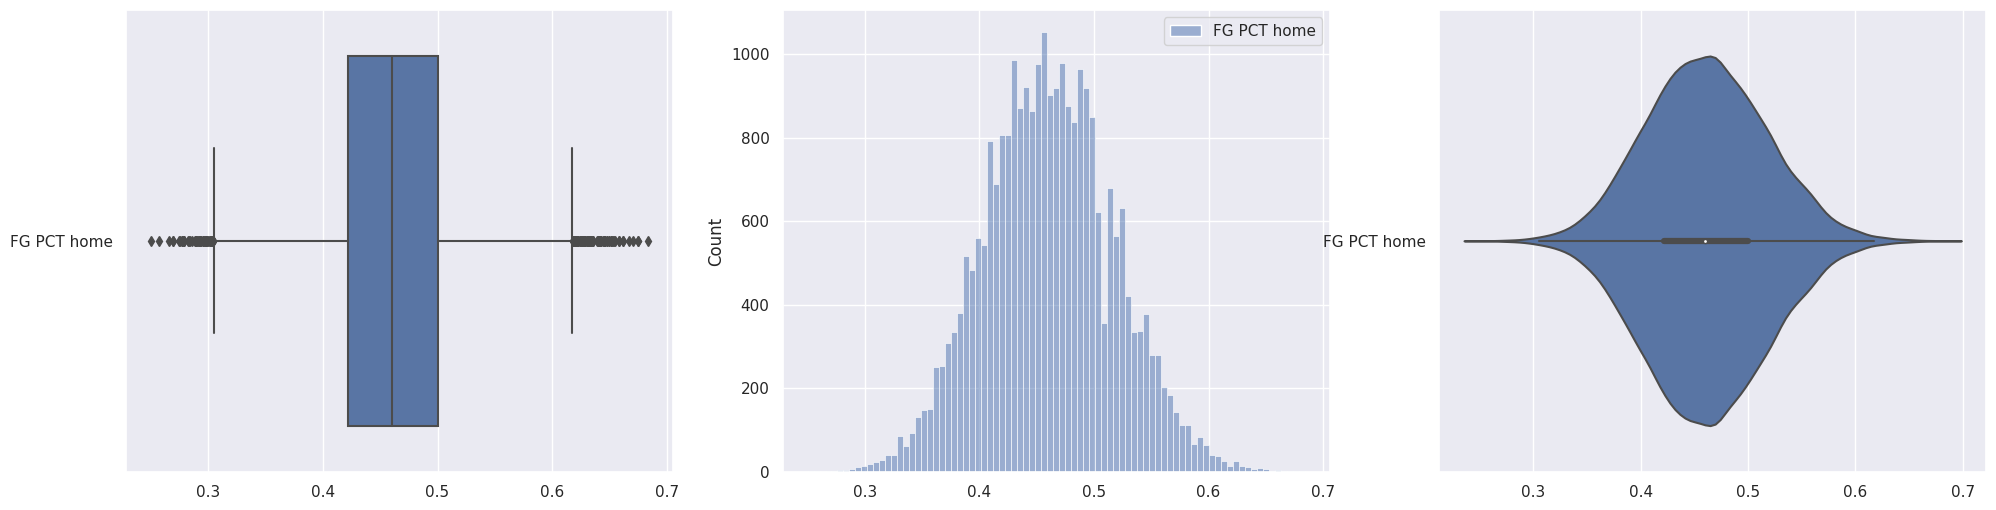

In [ ]:
# Plot the distributions of fg_rate
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = fg_rate, orient = "h", ax = axes[0])
sns.histplot(data = fg_rate, ax = axes[1])
sns.violinplot(data = fg_rate, orient = "h", ax = axes[2])


[]

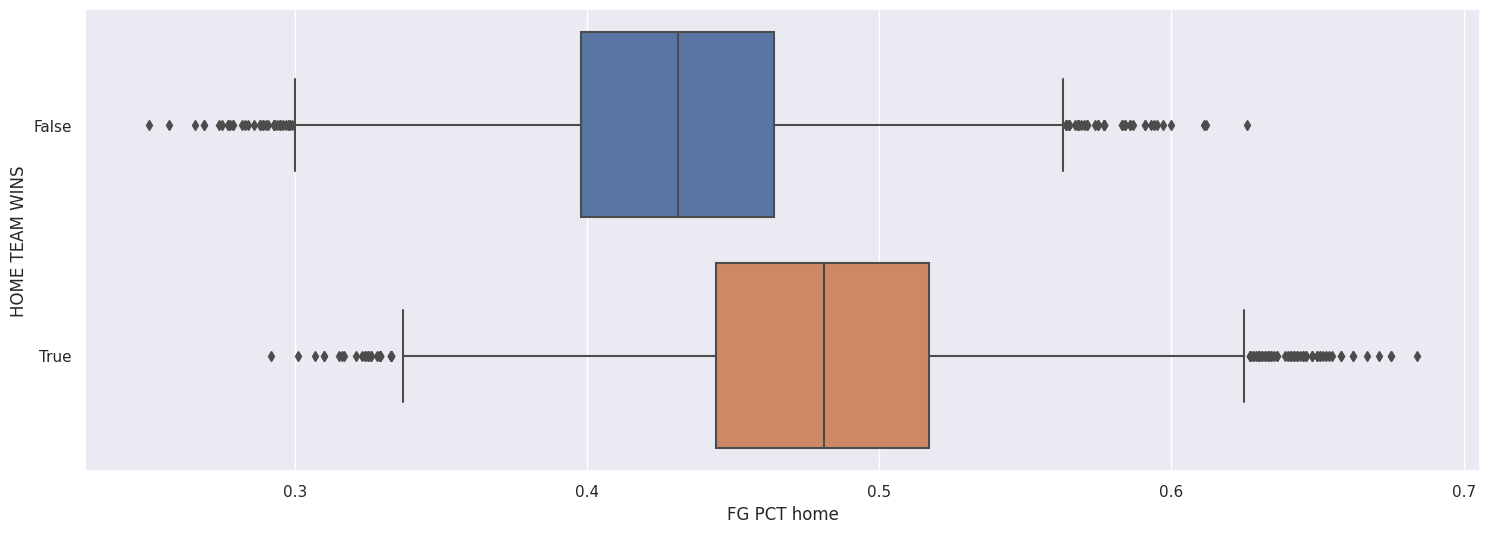

In [ ]:
# Create a joint dataframe of field goal rate with win rate
newDF1 = pd.concat([fg_rate, win], axis = 1).reindex(fg_rate.index)

# Joint boxplot 
f = plt.figure(figsize=(18, 6))
sns.boxplot(x = "FG PCT home", y = "HOME TEAM WINS", data = newDF1, orient = "h")
plt.plot()


<Axes: >

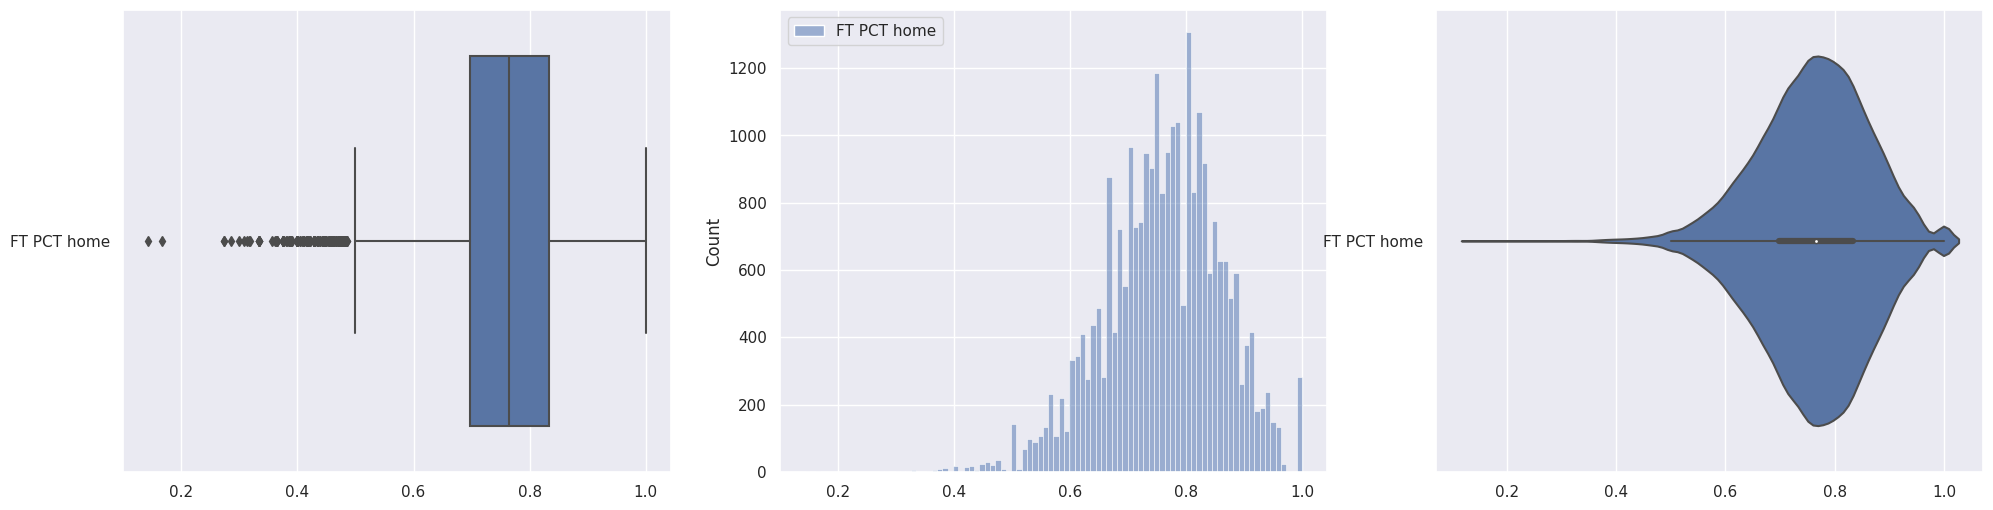

In [ ]:
# Plot the distributions of ft_rate
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = ft_rate, orient = "h", ax = axes[0])
sns.histplot(data = ft_rate, ax = axes[1])
sns.violinplot(data = ft_rate, orient = "h", ax = axes[2])

[]

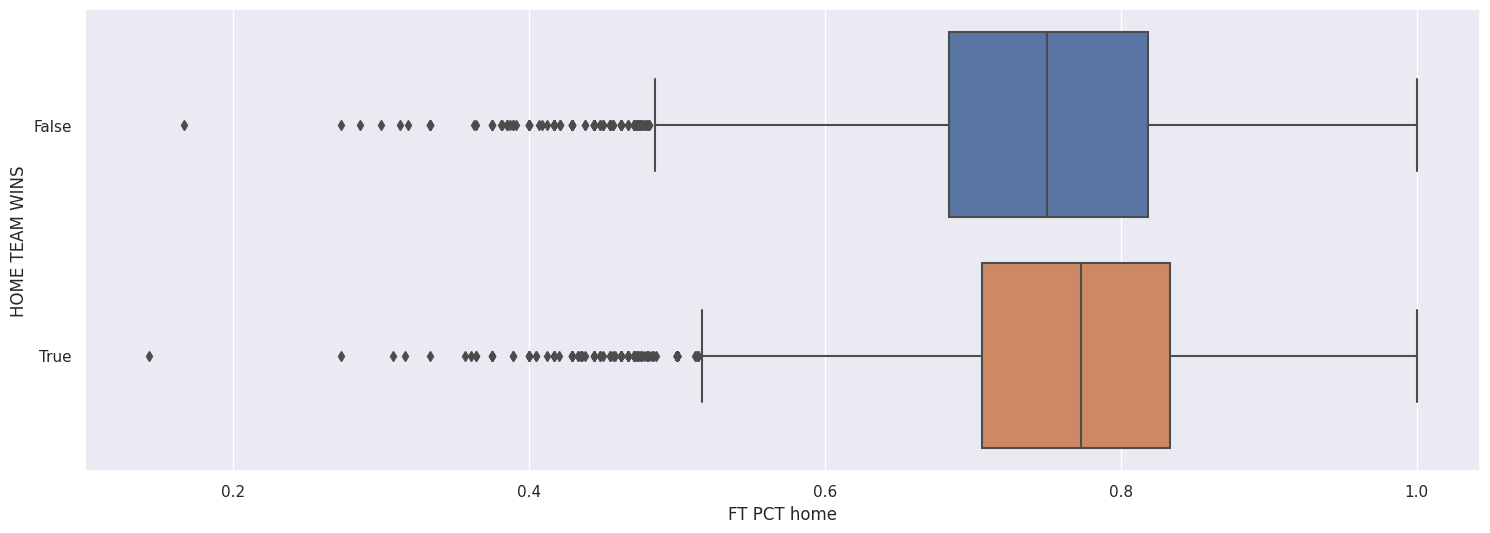

In [ ]:
# Create a joint dataframe of free throw rate with win rate
newDF2 = pd.concat([ft_rate, win], axis = 1).reindex(ft_rate.index)

# Joint boxplot 
f = plt.figure(figsize=(18, 6))
sns.boxplot(x = "FT PCT home", y = "HOME TEAM WINS", data = newDF2, orient = "h")
plt.plot()

<Axes: >

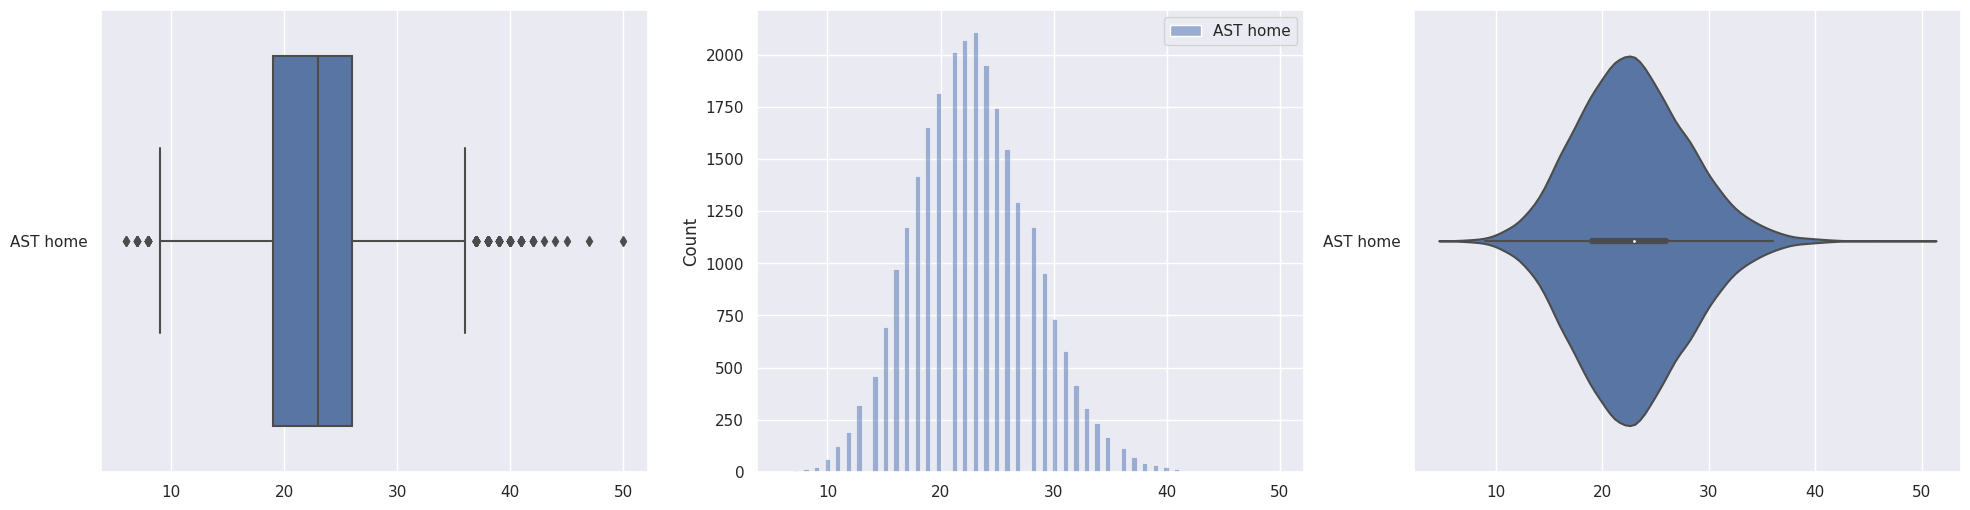

In [ ]:
# Plot the distributions of ast_count
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = ast_count, orient = "h", ax = axes[0])
sns.histplot(data = ast_count, ax = axes[1])
sns.violinplot(data = ast_count, orient = "h", ax = axes[2])

[]

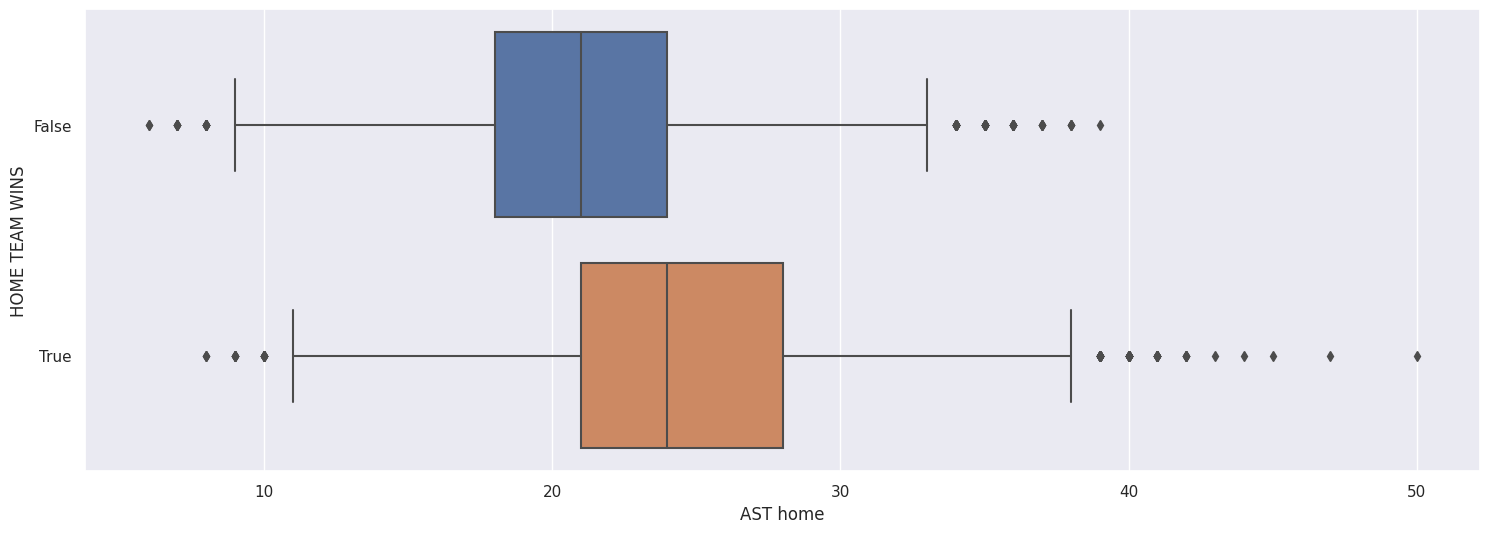

In [ ]:
# Create a joint dataframe of number of assist with win rate
newDF3 = pd.concat([ast_count, win], axis = 1).reindex(fg_rate.index)

# Joint boxplot 
f = plt.figure(figsize=(18, 6))
sns.boxplot(x = "AST home", y = "HOME TEAM WINS", data = newDF3, orient = "h")
plt.plot()

<Axes: >

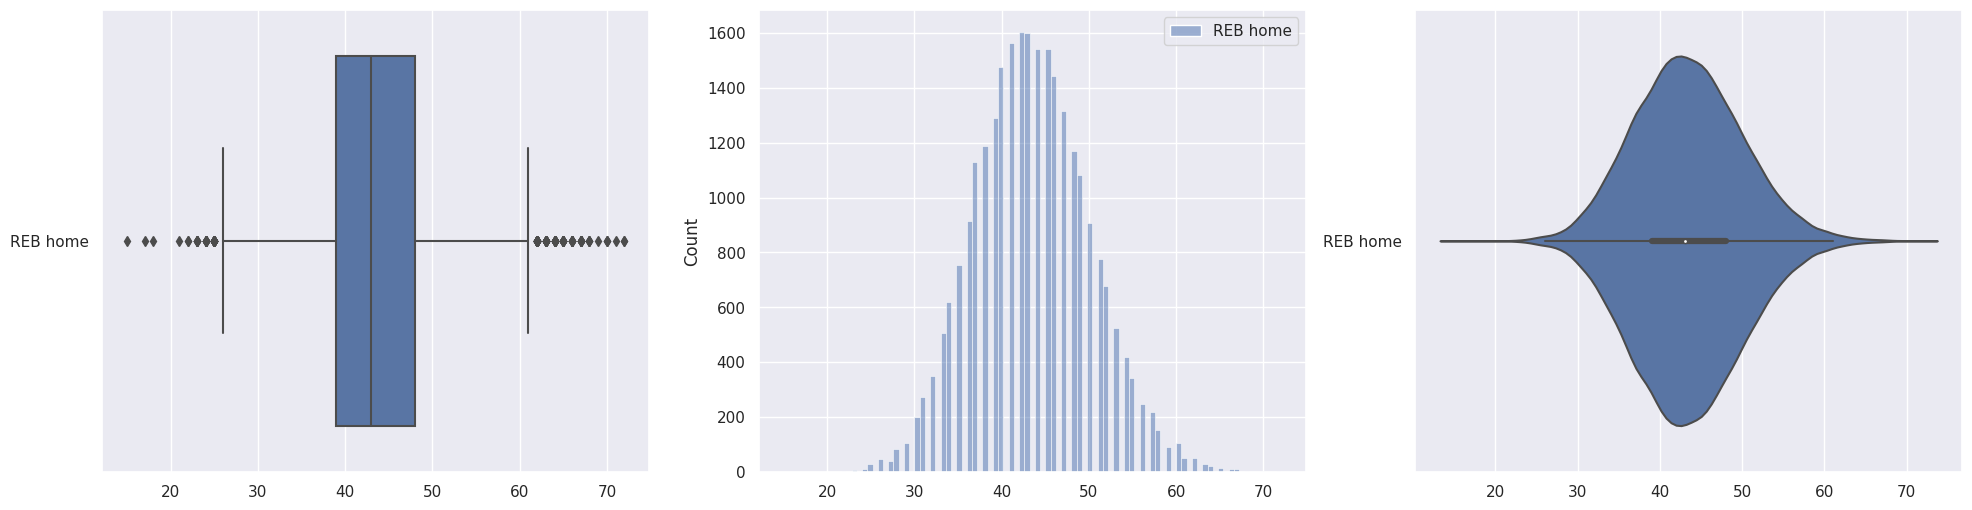

In [ ]:
# Plot the distributions of reb_count
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = reb_count, orient = "h", ax = axes[0])
sns.histplot(data = reb_count, ax = axes[1])
sns.violinplot(data = reb_count, orient = "h", ax = axes[2])

[]

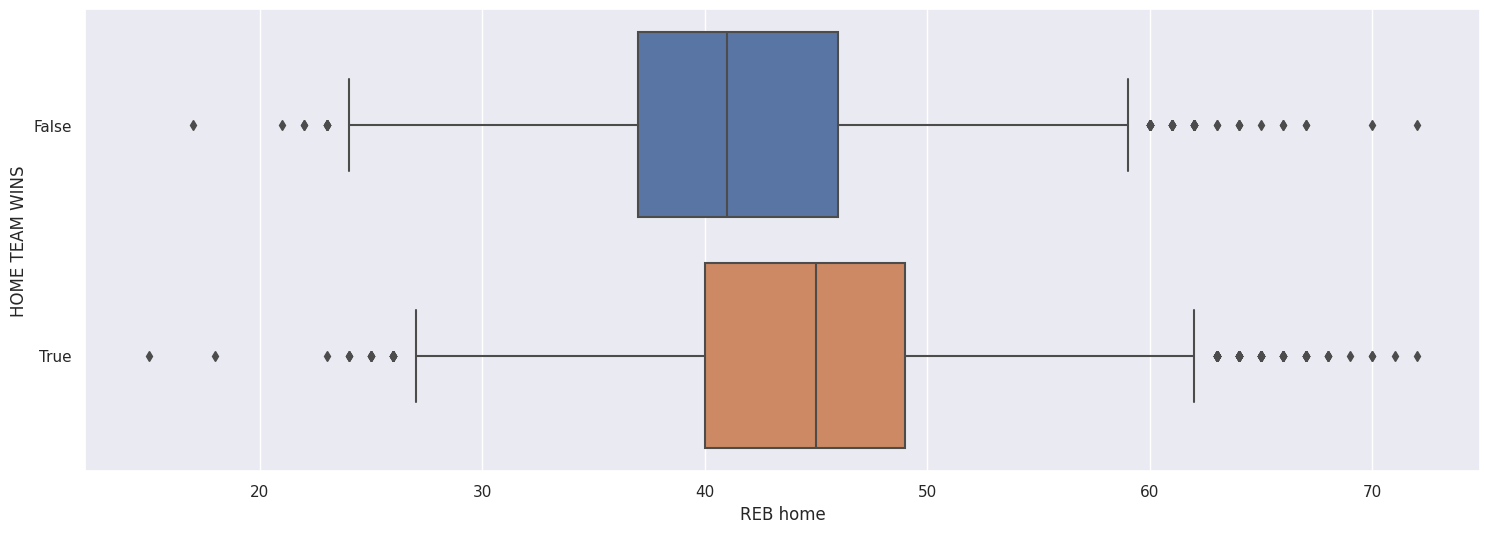

In [ ]:
# Create a joint dataframe of number of rebounds with win rate
newDF4 = pd.concat([reb_count, win], axis = 1).reindex(fg_rate.index)

# Joint boxplot 
f = plt.figure(figsize = (18, 6))
sns.boxplot(x = "REB home", y = "HOME TEAM WINS", data = newDF4, orient = "h")
plt.plot()

## Analysis of Exploratory data

From the plots of each of the column variables, it can be seen that the datasets of each column variable are generally well spread out, almost similar to a normal distribution. This is with the exception of the FT PCT home column where the data seem to be slightly skewed to the right. However, this does not mean that the data is deemed inaccurate or biased, as in a NBA game, it is likely that the Free Throw percentage to be near perfect.




Looking at the joint boxplots, we can observe the distribution of the data with regard to whether the home team wins or loses. From the 4 joint boxplots, while there isn’t a clear and significant variable that can determine whether the home team wins or not, the distribution of the data for the FG PCT home seems to have the clearest distinction between home team winning and losing, and hence it seem to be the best variable to be used to predict whether the home team wins at the moment. 


## Classification tree fitting

### FG PCT home

In [ ]:
X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.DataFrame
y_test: pd.DataFrame
newDF1 = newDF1.dropna()
X_train, X_test, y_train, y_test = train_test_split(newDF1["FG PCT home"].to_frame(), newDF1["HOME TEAM WINS"].to_frame(), test_size = 0.25)

#### Decision Tree Classifier

In [ ]:
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

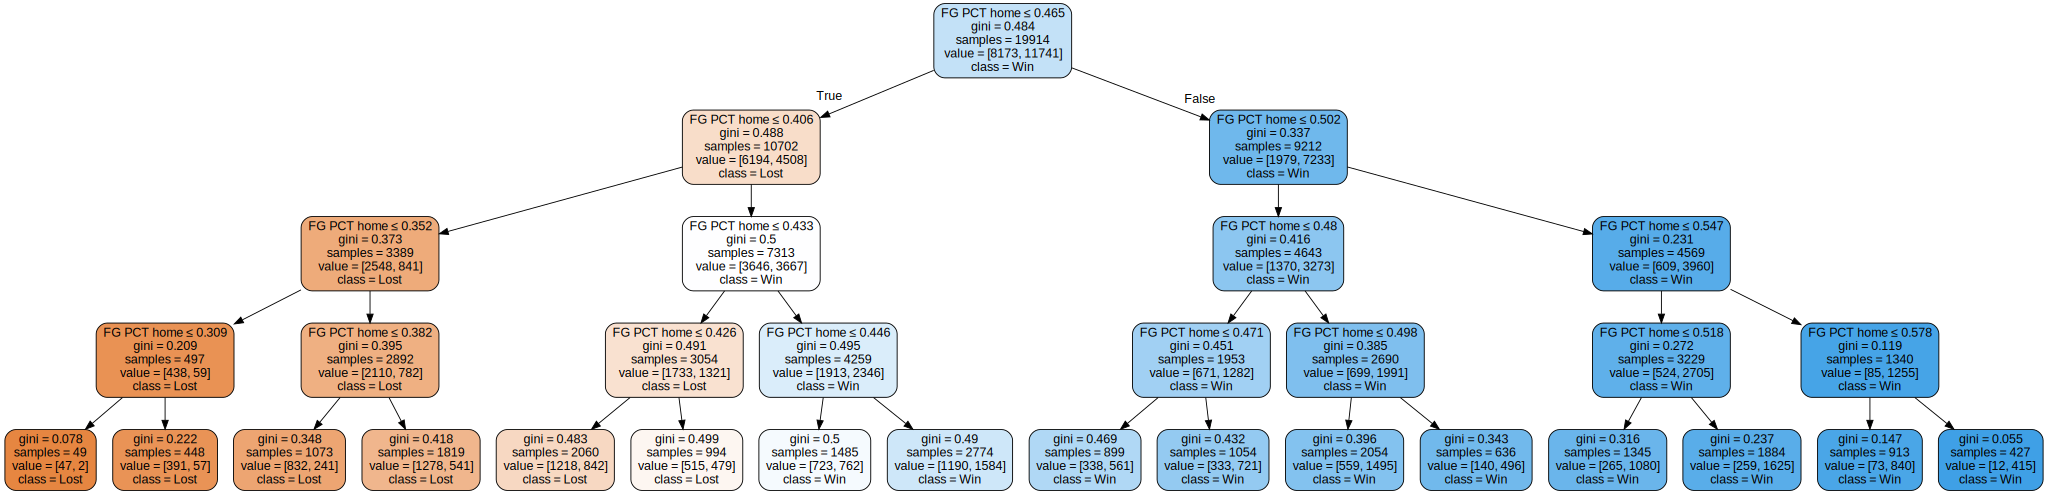

In [ ]:

export_data = export_graphviz(dectree, out_file=None, feature_names=X_train.columns, 
            rounded = True,
            filled=True,
            special_characters=True,
          class_names=["Lost","Win"])
graphviz.Source(export_data)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6959927689062971 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6877071407050316 



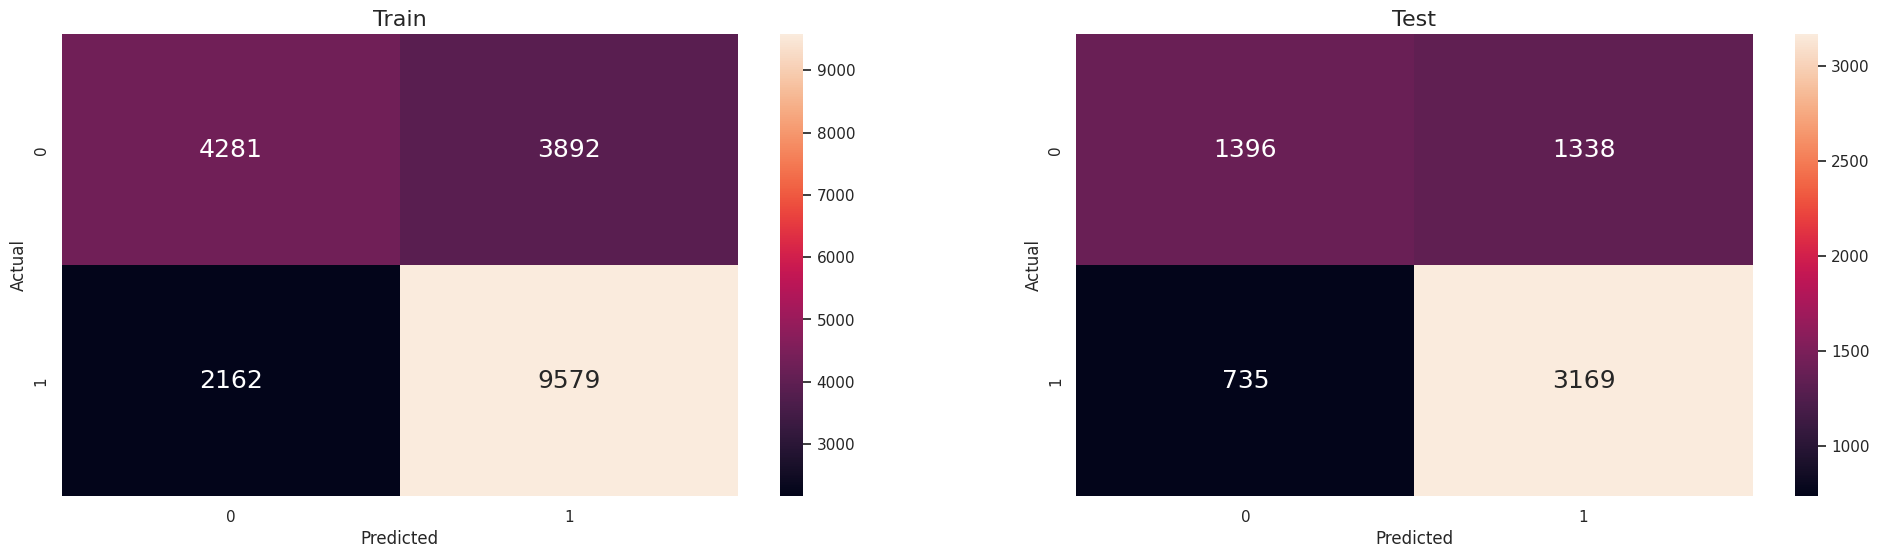

In [ ]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

plt.show()

#### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train.values.ravel())

LogisticRegression()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6956412574068495 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6904188008436276 



Text(1280.7954545454543, 0.5, 'Actual')

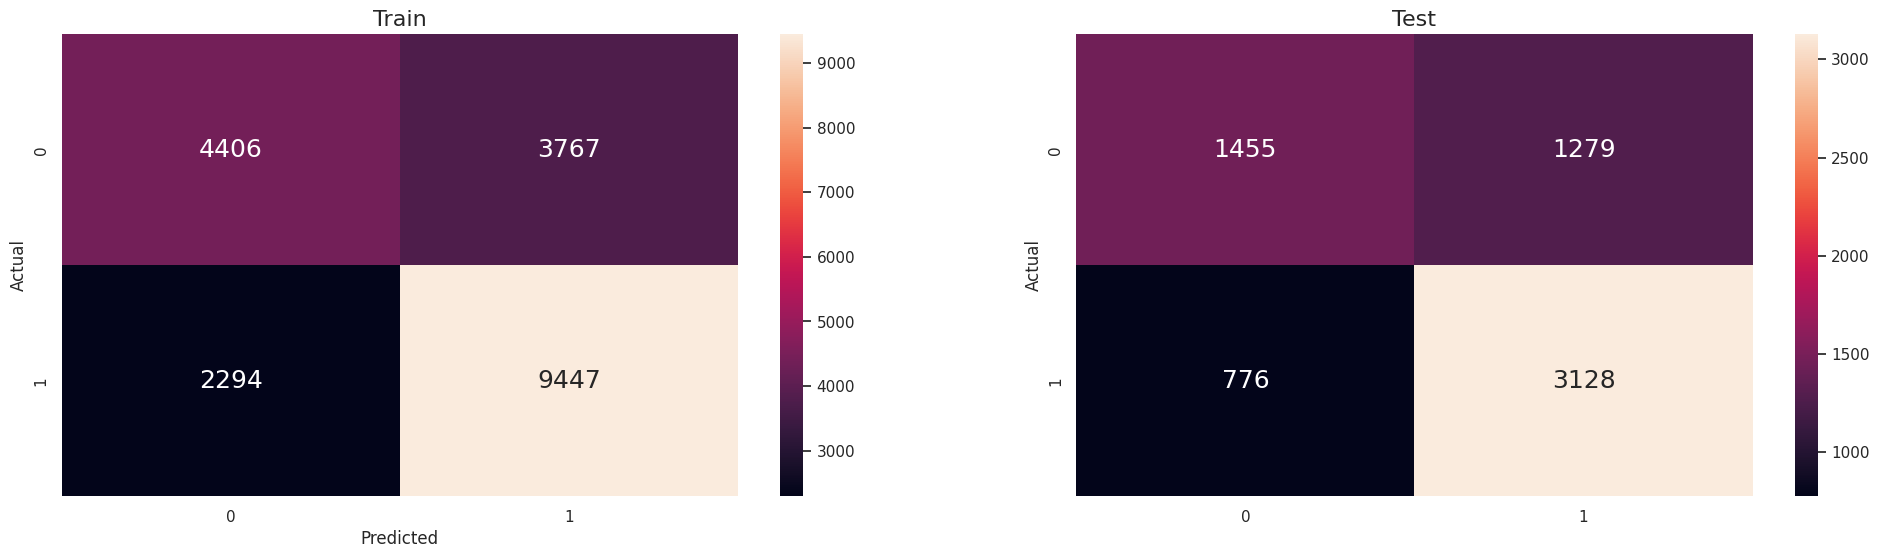

In [ ]:
lr_train_pred = lr.predict(X_train)
lr_test_pred =lr.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", lr.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", lr.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, lr_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, lr_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")

####  Nearest Centroid Classifier

In [ ]:
nc = NearestCentroid()
nc.fit(X_train, y_train.values.ravel())

NearestCentroid()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6821833885708547 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6877071407050316 



Text(0.5, 32.249999999999986, 'Predicted')

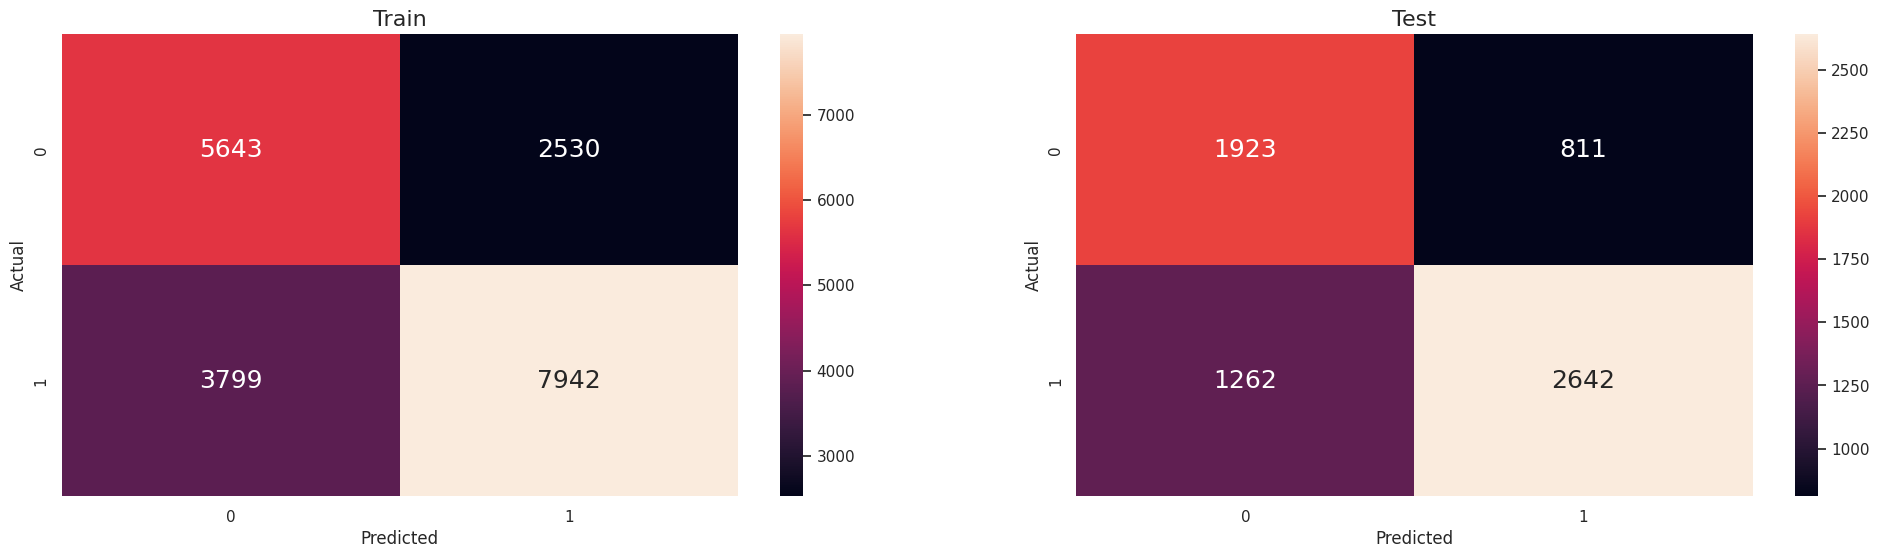

In [ ]:

nc_train_pred = nc.predict(X_train)
nc_test_pred = nc.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", nc.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", nc.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, nc_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, nc_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

#### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6980014060459978 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6890629707743297 



Text(0.5, 32.249999999999986, 'Predicted')

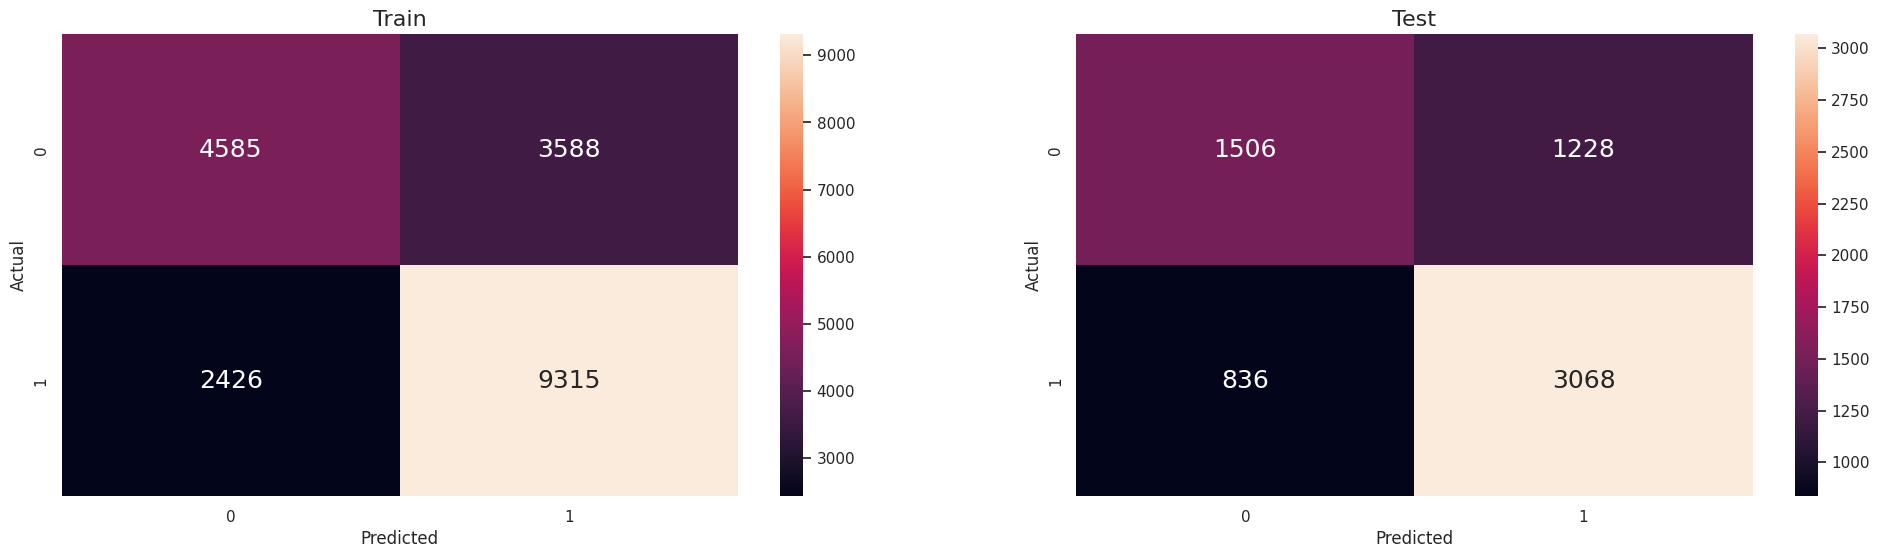

In [ ]:
rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, rfc_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, rfc_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

### FT PCT home

In [ ]:
X_train2: pd.DataFrame
X_test2: pd.DataFrame
y_train2: pd.DataFrame
y_test2: pd.DataFrame
newDF2 = newDF2.dropna()
X_train2, X_test2, y_train2, y_test2 = train_test_split(newDF2["FT PCT home"].to_frame(), newDF2["HOME TEAM WINS"].to_frame(), test_size = 0.25)

#### Decision Tree Classifier

In [ ]:
FT_PCT_home_dectree = DecisionTreeClassifier(max_depth = 4)
FT_PCT_home_dectree.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=4)

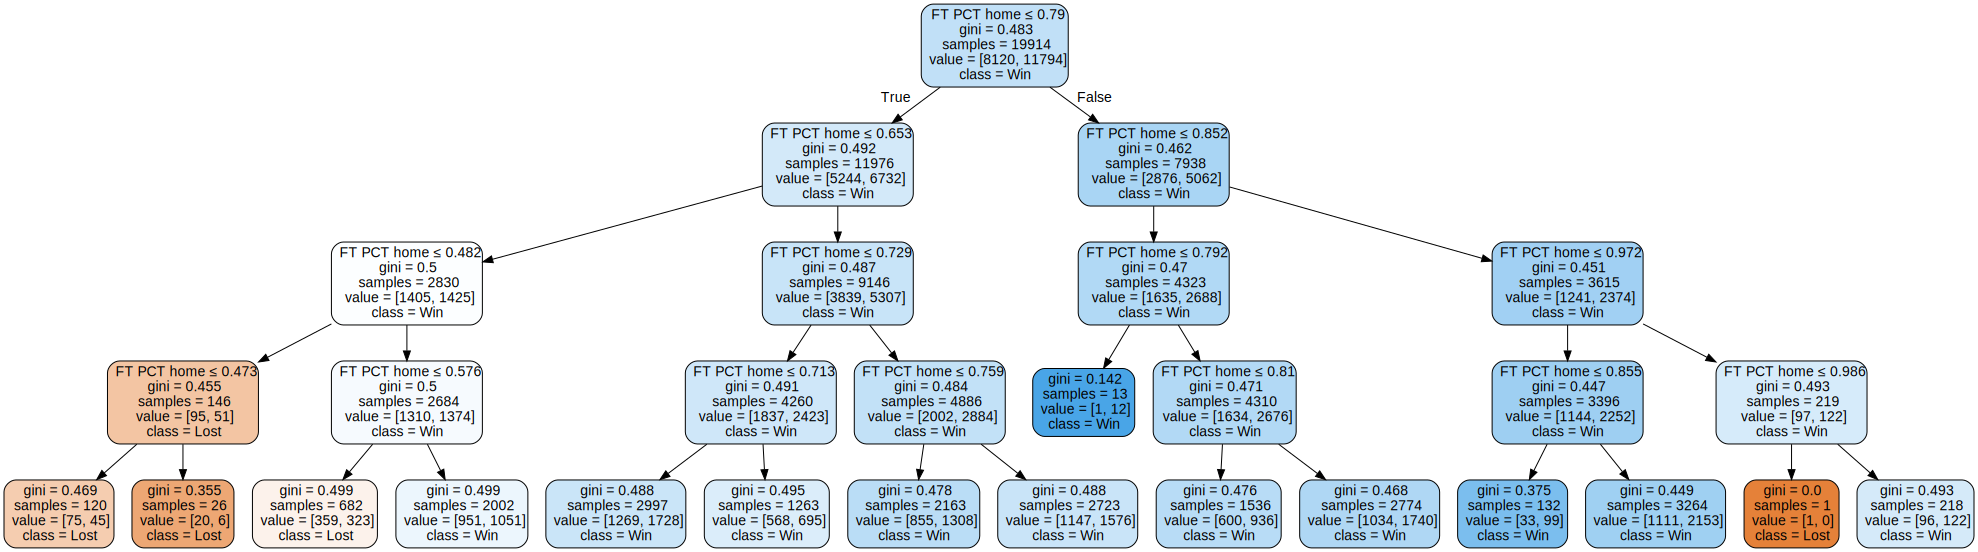

In [ ]:
export_data =  export_graphviz(FT_PCT_home_dectree, out_file=None, feature_names=X_train2.columns, 
            rounded = True,
            filled=True,
            special_characters=True,
          class_names=["Lost","Win"])
graphviz.Source(export_data)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5963141508486491 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.585718589936728 



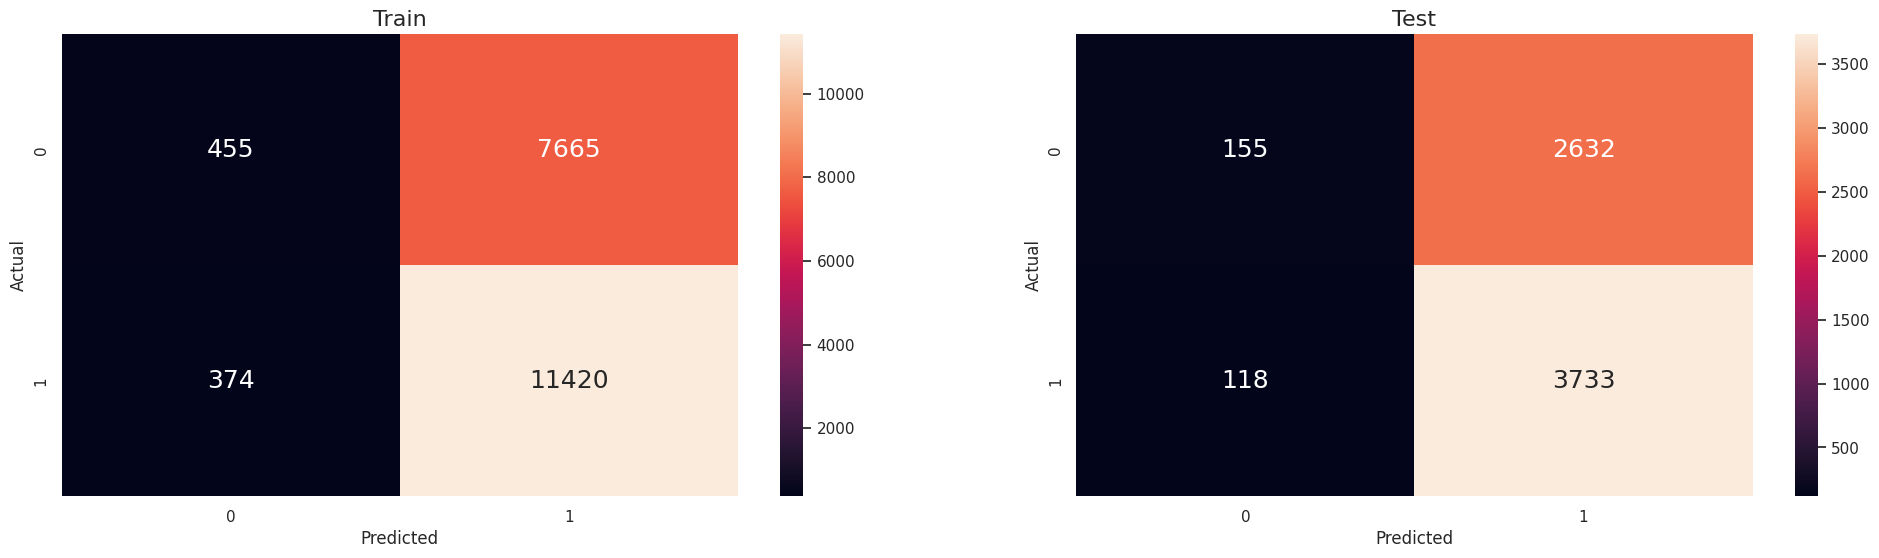

In [ ]:
y_train_pred = FT_PCT_home_dectree.predict(X_train2)
y_test_pred = FT_PCT_home_dectree.predict(X_test2)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", FT_PCT_home_dectree.score(X_train2, y_train2), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", FT_PCT_home_dectree.score(X_test2, y_test2), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train2, y_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test2, y_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

plt.show()

#### Logistic Regression

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2.values.ravel())

LogisticRegression()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5947574570653812 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5839108165109973 



Text(1280.7954545454543, 0.5, 'Actual')

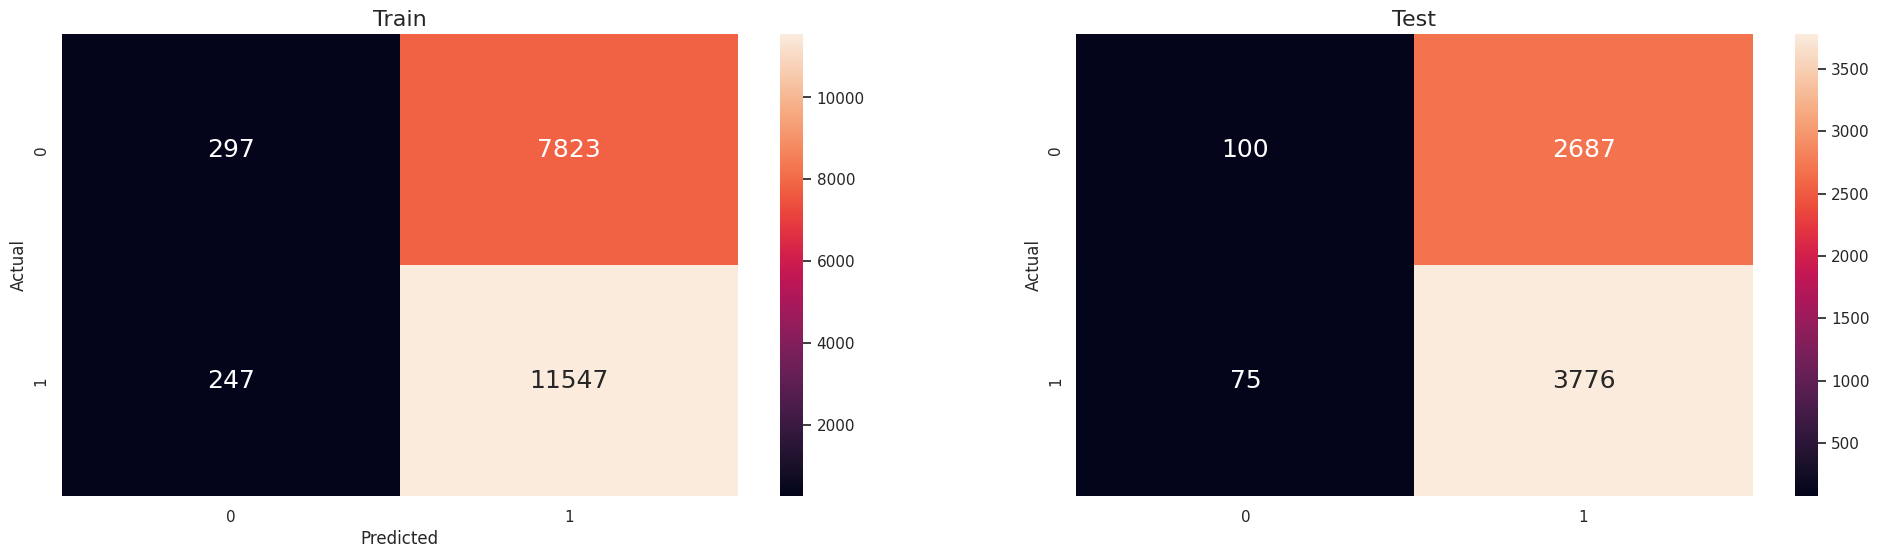

In [ ]:
lr_train_pred = lr2.predict(X_train2)
lr_test_pred =lr2.predict(X_test2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", lr2.score(X_train2, y_train2), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", lr2.score(X_test2, y_test2), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train2, lr_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test2, lr_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")

####  Nearest Centroid Classifier

In [ ]:
nc2 = NearestCentroid()
nc2.fit(X_train2, y_train2.values.ravel())

NearestCentroid()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5390679923671788 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5453449834287436 



Text(0.5, 32.249999999999986, 'Predicted')

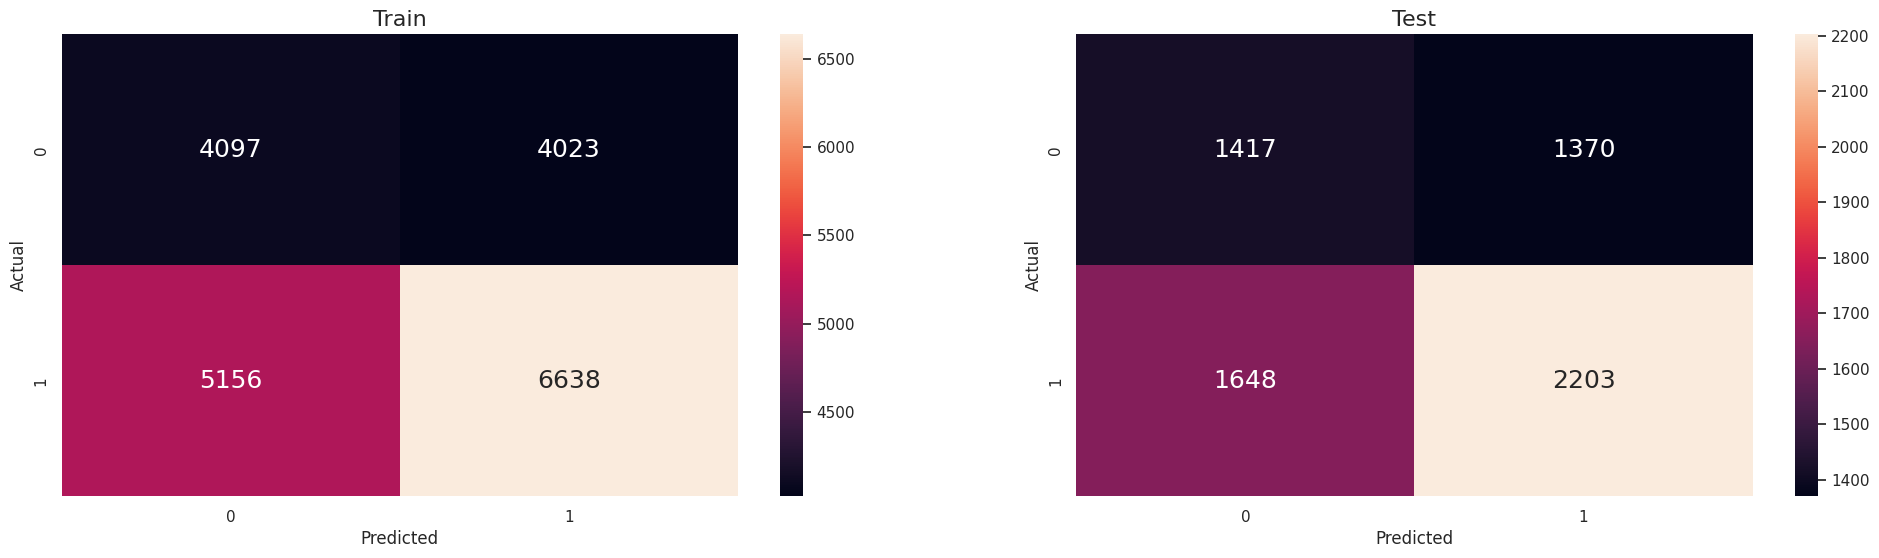

In [ ]:

nc_train_pred = nc2.predict(X_train2)
nc_test_pred = nc2.predict(X_test2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", nc2.score(X_train2, y_train2), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", nc2.score(X_test2, y_test2), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train2, nc_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test2, nc_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

#### Random Forest Classifier

In [ ]:
rfc2 = RandomForestClassifier(n_estimators = 100)
rfc2.fit(X_train2, y_train2.values.ravel())

RandomForestClassifier()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6030933011951392 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5833082253690871 



Text(0.5, 32.249999999999986, 'Predicted')

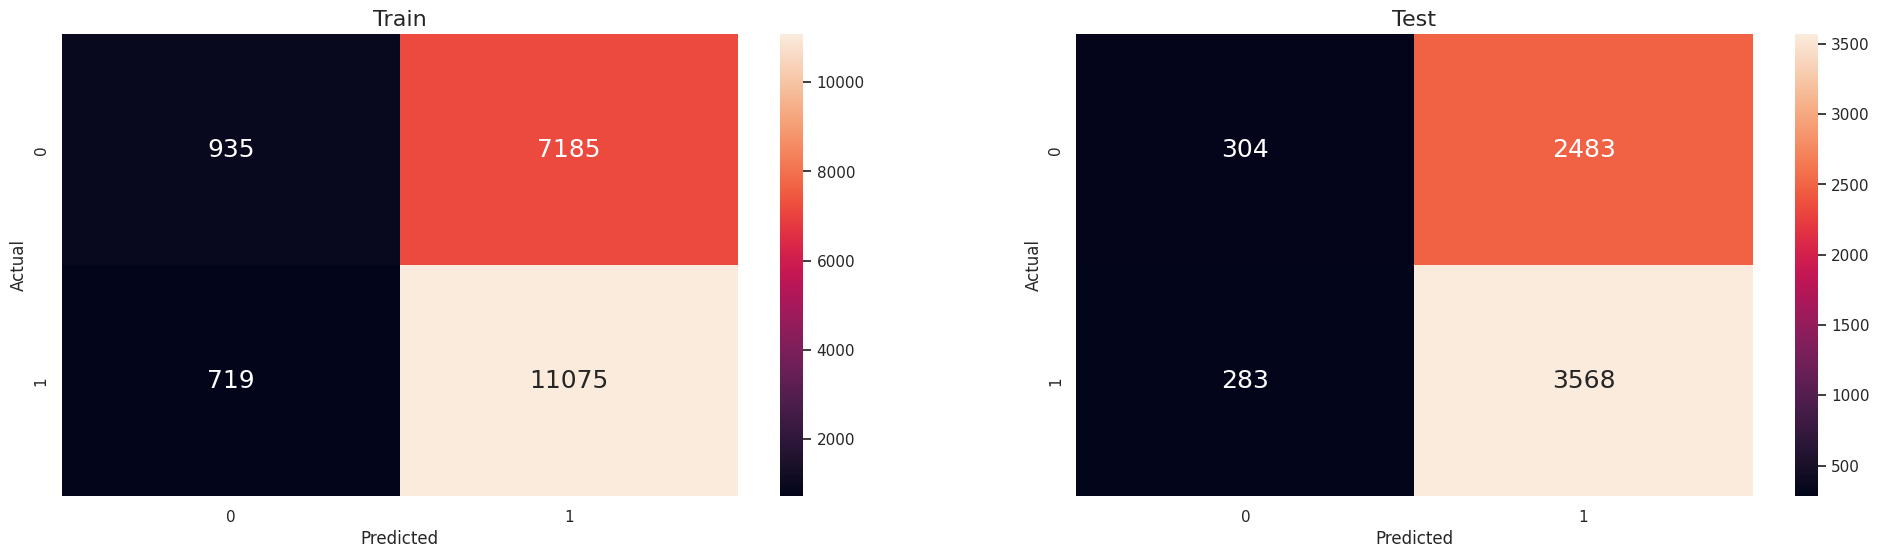

In [ ]:
rfc_train_pred = rfc2.predict(X_train2)
rfc_test_pred = rfc2.predict(X_test2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc2.score(X_train2, y_train2), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc2.score(X_test2, y_test2), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train2, rfc_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test2, rfc_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

### AST home

In [ ]:
X_train3: pd.DataFrame
X_test3: pd.DataFrame
y_train3: pd.DataFrame
y_test3: pd.DataFrame
newDF3 = newDF3.dropna()
X_train3, X_test3, y_train3, y_test3 = train_test_split(newDF3["AST home"].to_frame(), newDF3["HOME TEAM WINS"].to_frame(), test_size = 0.25)

#### Decision Tree Classifier

In [ ]:
dectree3 = DecisionTreeClassifier(max_depth = 4)
dectree3.fit(X_train3, y_train3)

DecisionTreeClassifier(max_depth=4)

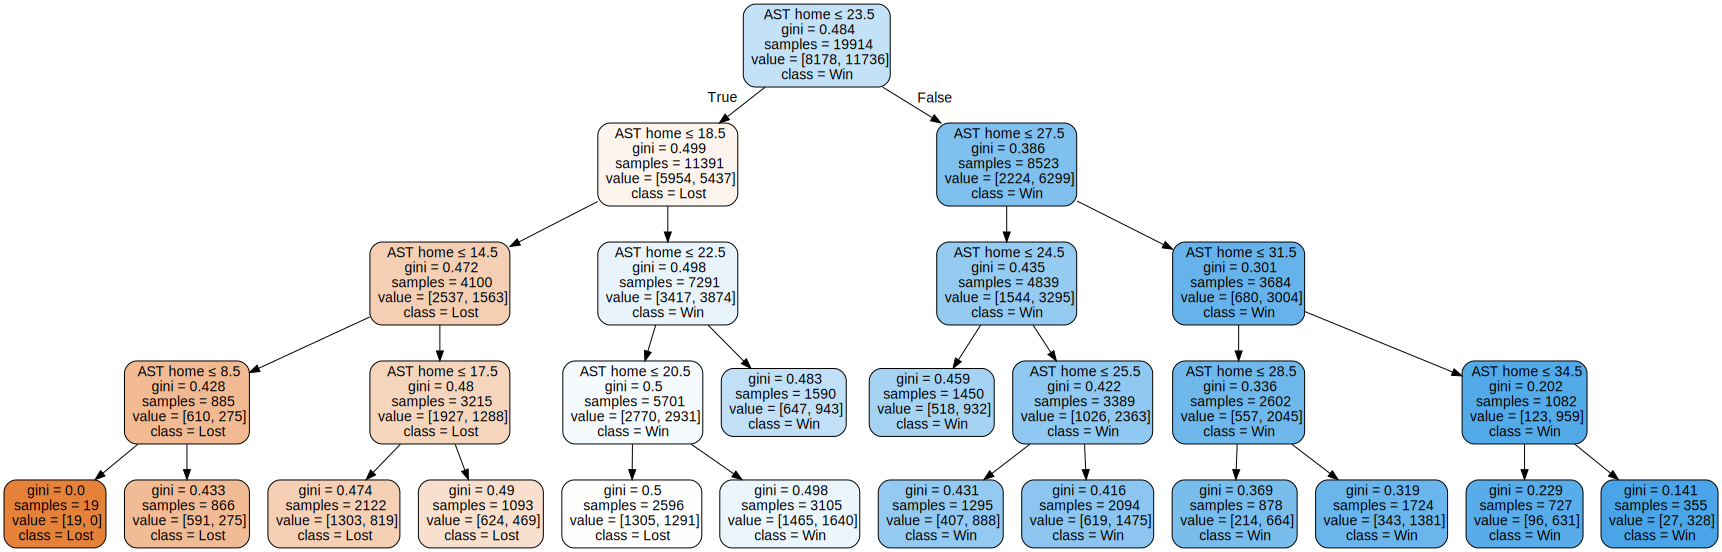

In [ ]:
export_data =  export_graphviz(dectree3, out_file=None, feature_names=X_train3.columns, 
            rounded = True,
            filled=True,
            special_characters=True,
          class_names=["Lost","Win"])
graphviz.Source(export_data)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6389474741387968 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.64100632720699 



Text(0.5, 32.249999999999986, 'Predicted')

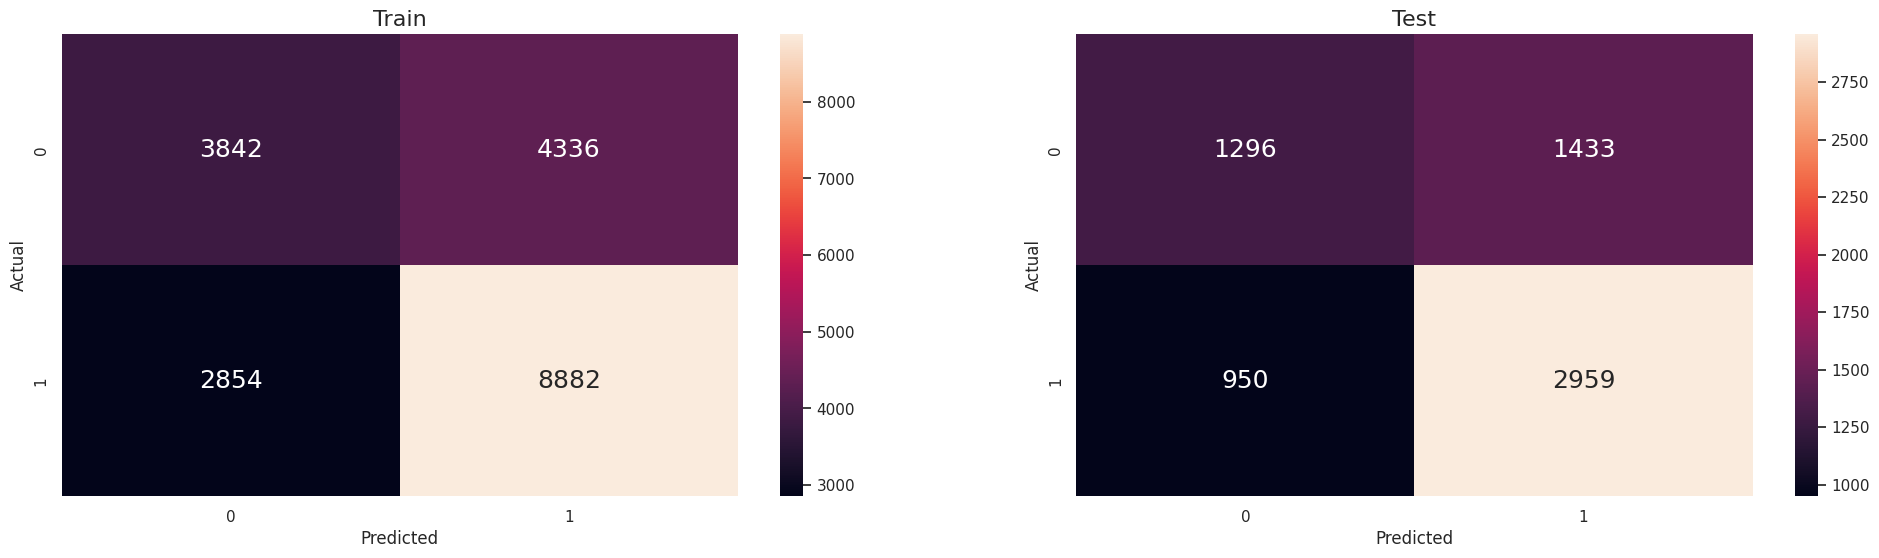

In [ ]:
y_train_pred = dectree3.predict(X_train3)
y_test_pred = dectree3.predict(X_test3)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(X_train3, y_train3), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(X_test3, y_test3), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train3, y_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test3, y_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

#### Logistic Regression

In [ ]:
lr3 = LogisticRegression()
lr3.fit(X_train3, y_train3.values.ravel())

LogisticRegression()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6399517927086472 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6414582705634227 



Text(1280.7954545454543, 0.5, 'Actual')

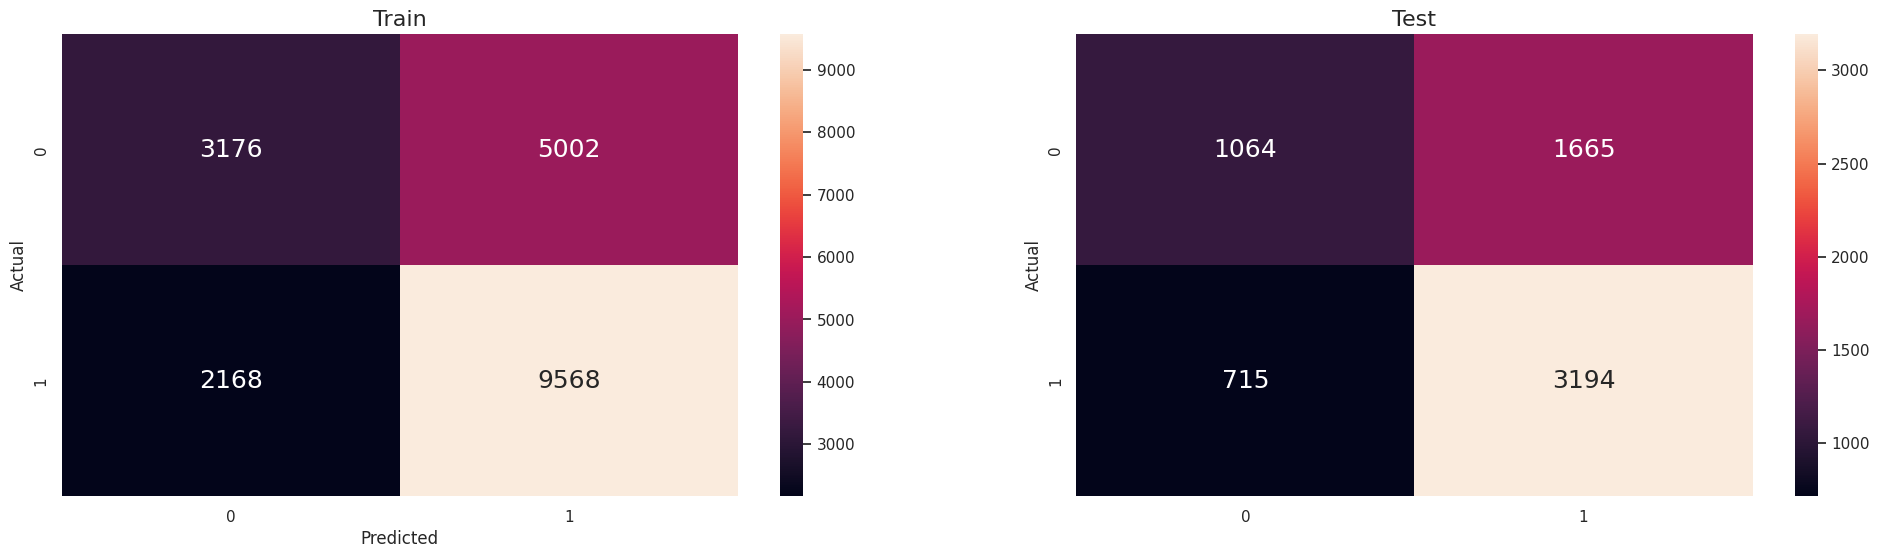

In [ ]:
lr_train_pred = lr3.predict(X_train3)
lr_test_pred =lr3.predict(X_test3)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", lr3.score(X_train3, y_train3), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", lr3.score(X_test3, y_test3), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train3, lr_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test3, lr_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")

####  Nearest Centroid Classifier

In [ ]:
nc3 = NearestCentroid()
nc3.fit(X_train3, y_train3.values.ravel())

NearestCentroid()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6301596866526062 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.617053329316059 



Text(0.5, 32.249999999999986, 'Predicted')

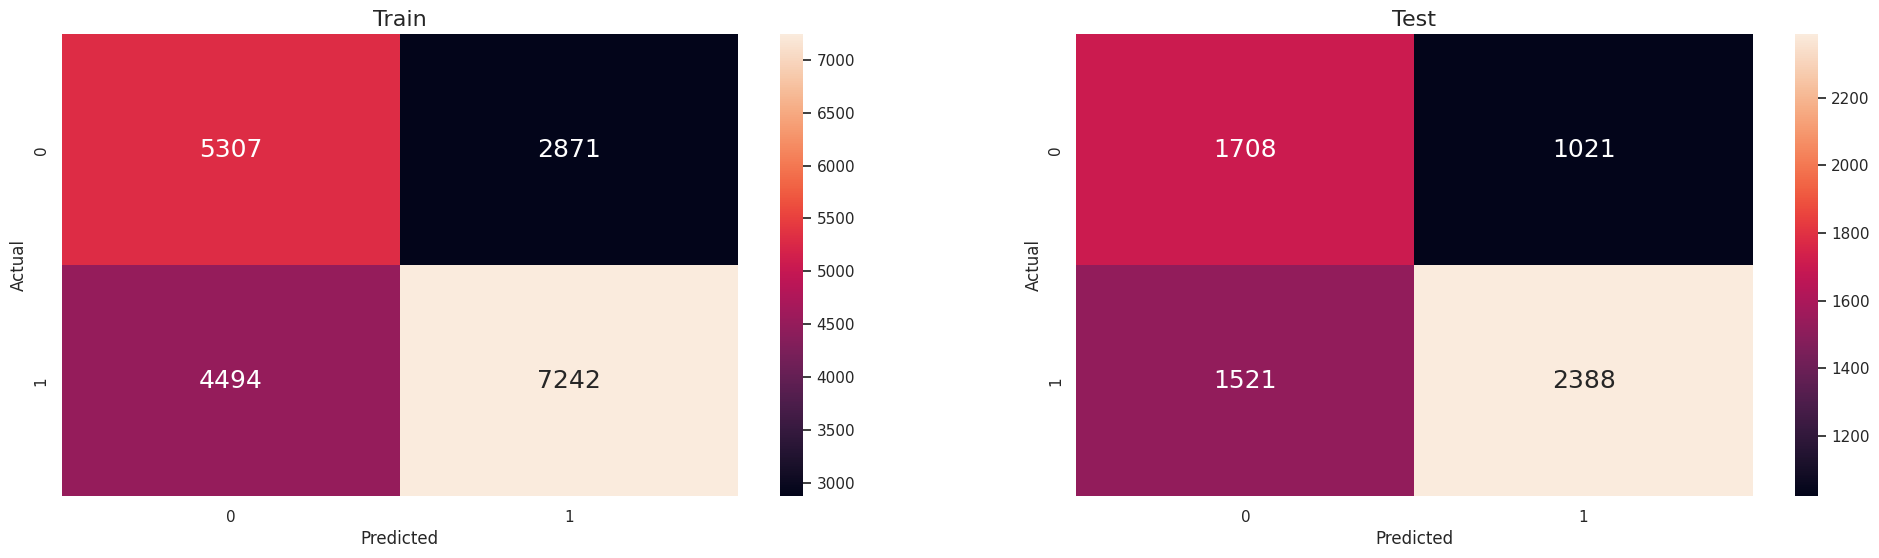

In [ ]:
nc_train_pred = nc3.predict(X_train3)
nc_test_pred = nc3.predict(X_test3)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", nc3.score(X_train3, y_train3), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", nc3.score(X_test3, y_test3), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train3, nc_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test3, nc_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

#### Random Forest Classifier

In [ ]:
rfc3 = RandomForestClassifier(n_estimators = 100)
rfc3.fit(X_train3, y_train3.values.ravel())

RandomForestClassifier()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6399517927086472 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6414582705634227 



Text(1280.7954545454543, 0.5, 'Actual')

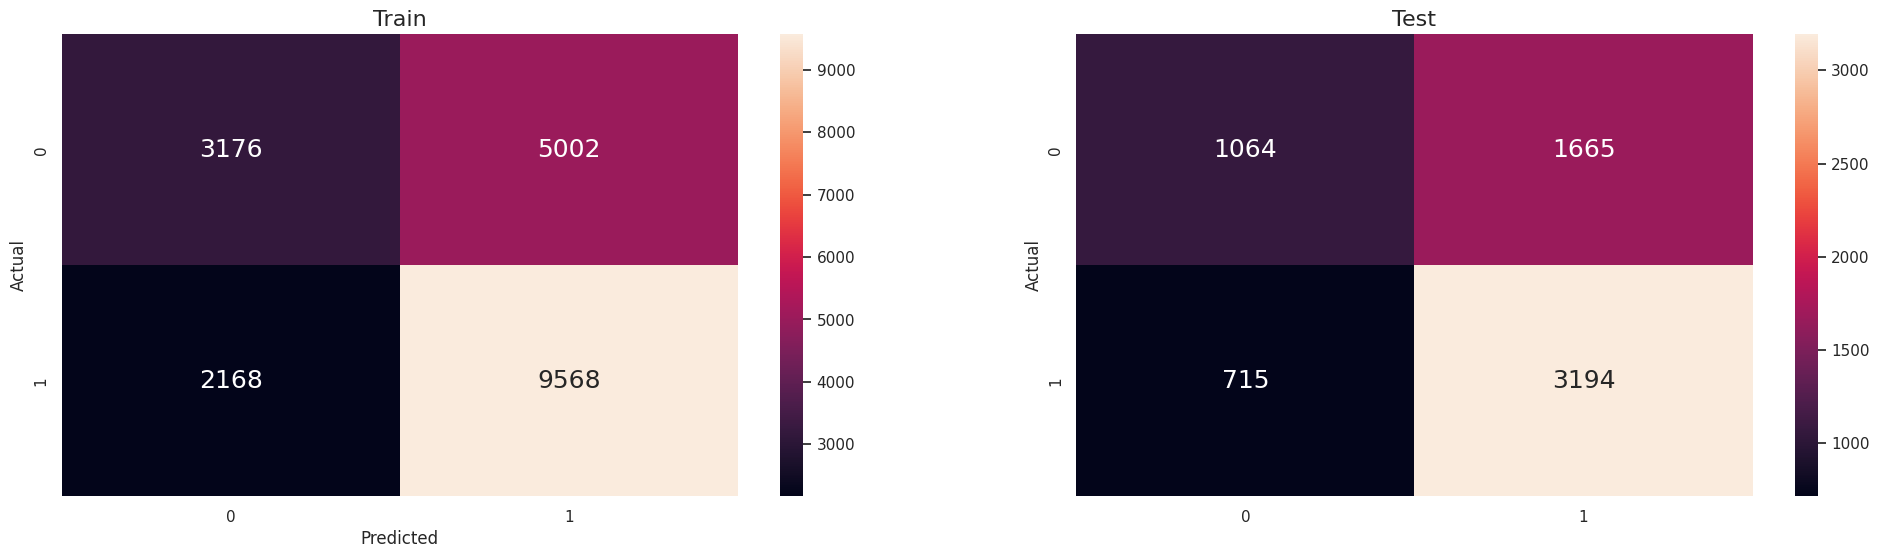

In [ ]:
rfc_train_pred = rfc3.predict(X_train3)
rfc_test_pred = rfc3.predict(X_test3)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc3.score(X_train3, y_train3), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc3.score(X_test3, y_test3), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train3, rfc_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test3, rfc_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")

### REB home

In [ ]:
X_train4: pd.DataFrame
X_test4: pd.DataFrame
y_train4: pd.DataFrame
y_test4: pd.DataFrame
newDF4 = newDF4.dropna()
X_train4, X_test4, y_train4, y_test4 = train_test_split(newDF4["REB home"].to_frame(), newDF4["HOME TEAM WINS"].to_frame(), test_size = 0.25)

#### Decision Tree Classifier

In [ ]:
dectree4 = DecisionTreeClassifier(max_depth = 4)
dectree4.fit(X_train4, y_train4)

DecisionTreeClassifier(max_depth=4)

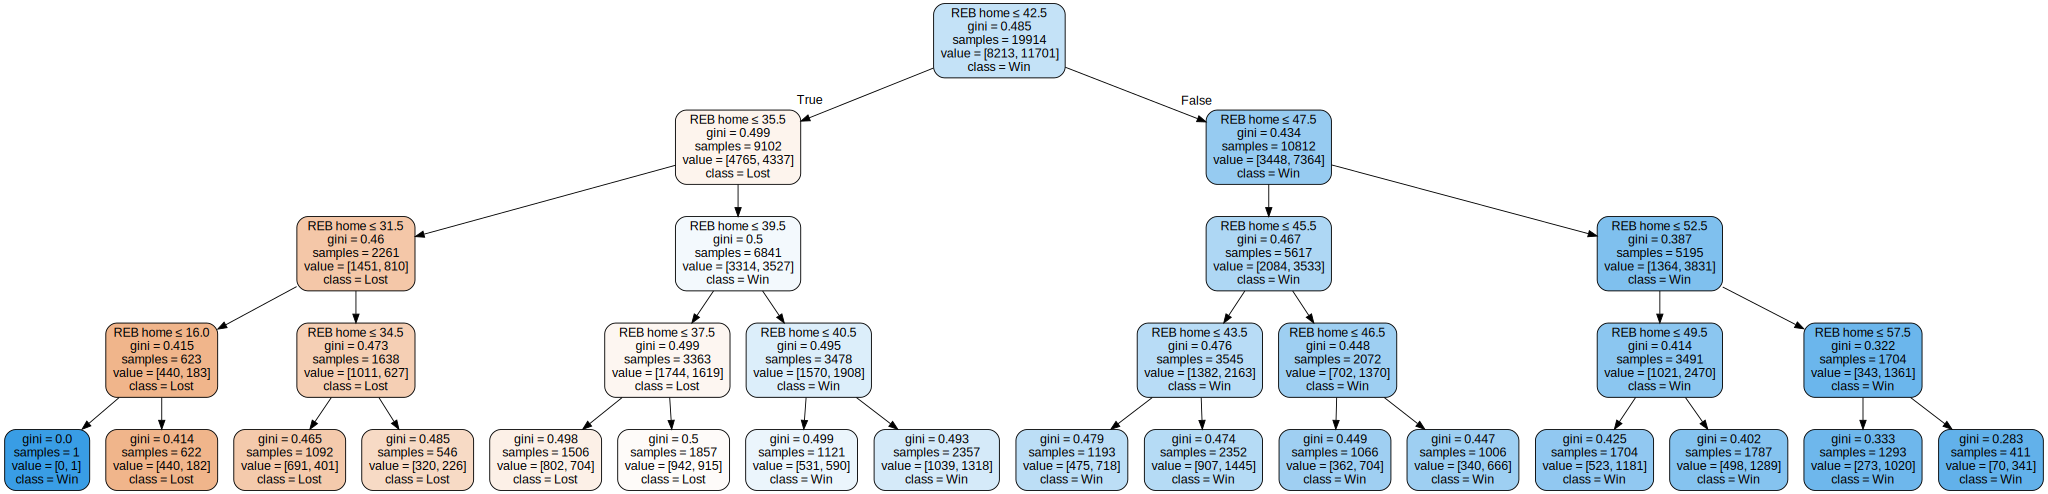

In [ ]:
export_data = export_graphviz(dectree4, out_file=None, feature_names=X_train4.columns, 
            rounded = True,
            filled=True,
            special_characters=True,
          class_names=["Lost","Win"])
graphviz.Source(export_data)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6260921964447123 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6205182283820427 



Text(0.5, 32.249999999999986, 'Predicted')

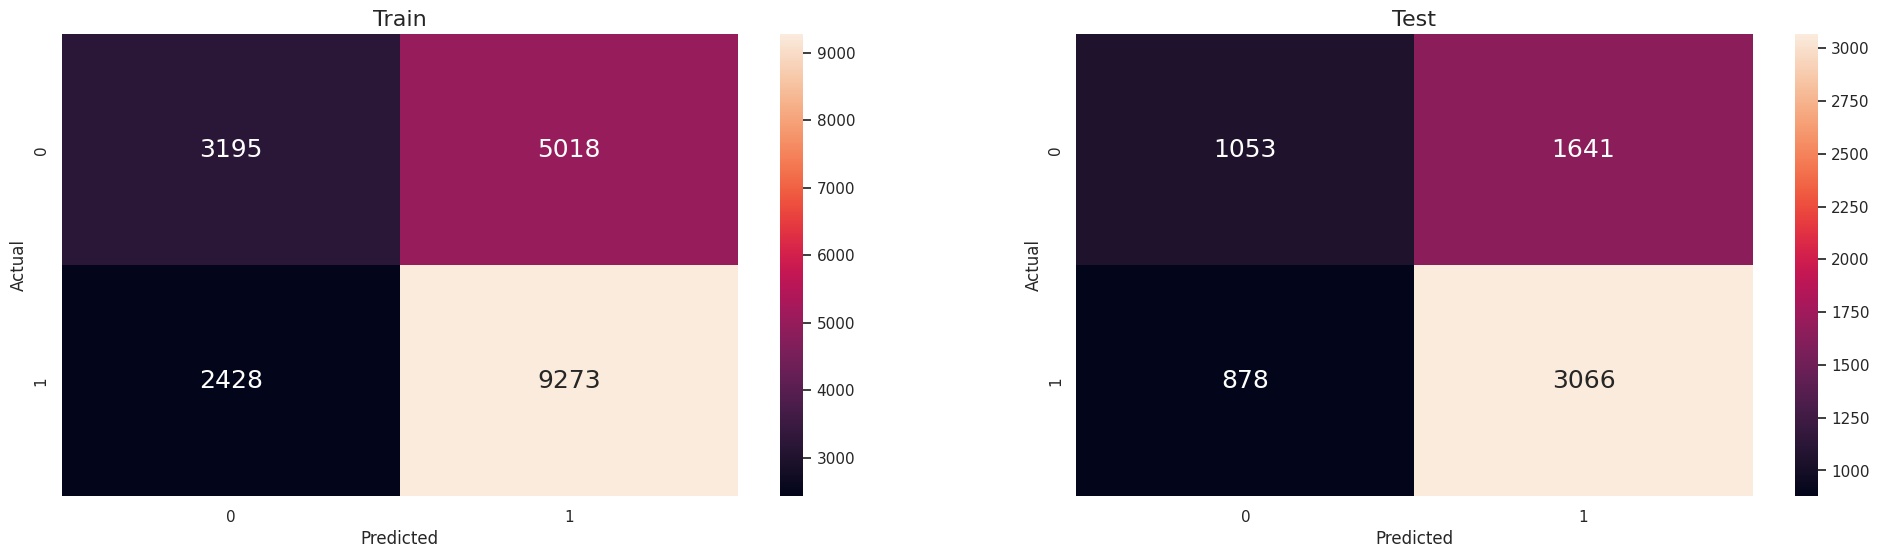

In [ ]:
y_train_pred = dectree4.predict(X_train4)
y_test_pred = dectree4.predict(X_test4)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(X_train4, y_train4), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(X_test4, y_test4), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train4, y_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test4, y_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

#### Logistic Regression

In [ ]:
lr4 = LogisticRegression()
lr4.fit(X_train4, y_train4.values.ravel())

LogisticRegression()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6254393893743095 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6232298885206388 



Text(1280.7954545454543, 0.5, 'Actual')

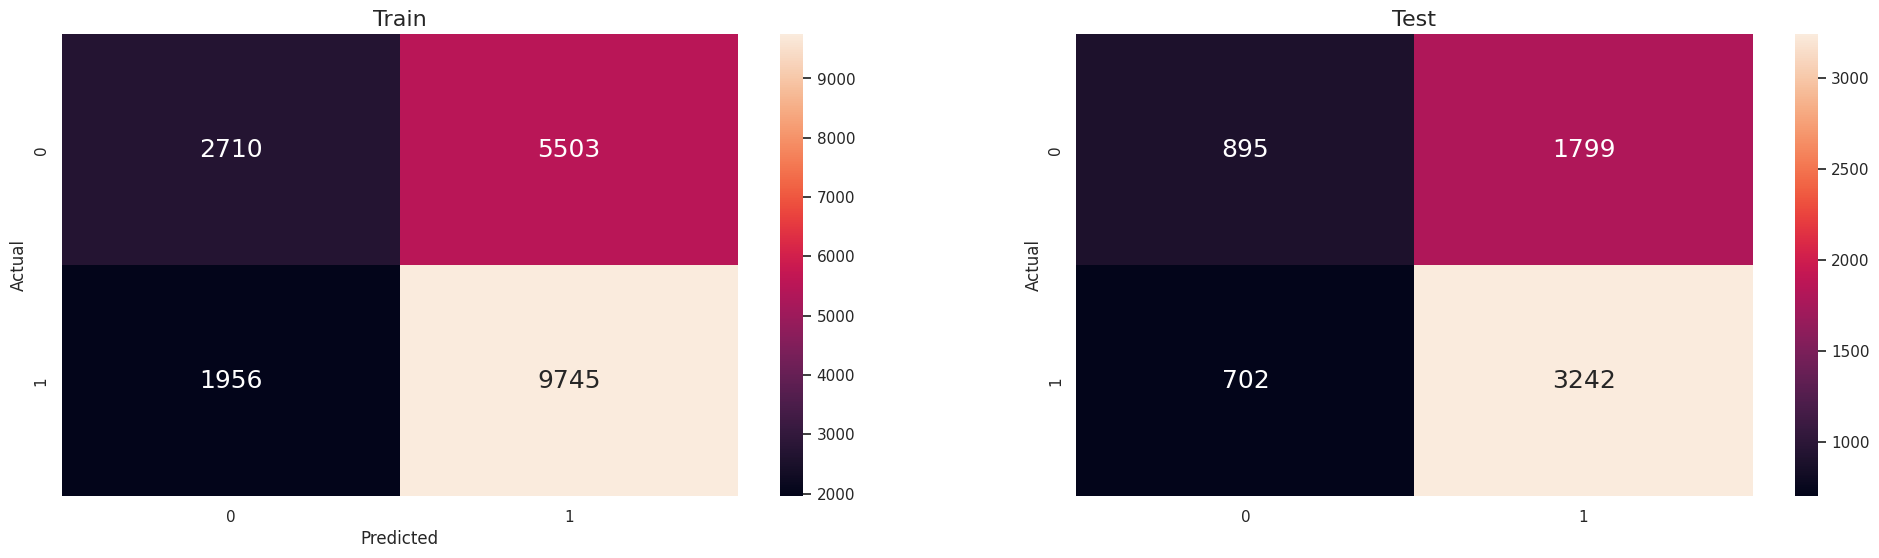

In [ ]:
lr_train_pred = lr4.predict(X_train4)
lr_test_pred =lr4.predict(X_test4)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", lr4.score(X_train4, y_train4), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", lr4.score(X_test4, y_test4), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train4, lr_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test4, lr_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")

####  Nearest Centroid Classifier

In [ ]:
nc4 = NearestCentroid()
nc4.fit(X_train4, y_train4.values.ravel())

NearestCentroid()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5968665260620669 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5905393190720096 



Text(0.5, 32.249999999999986, 'Predicted')

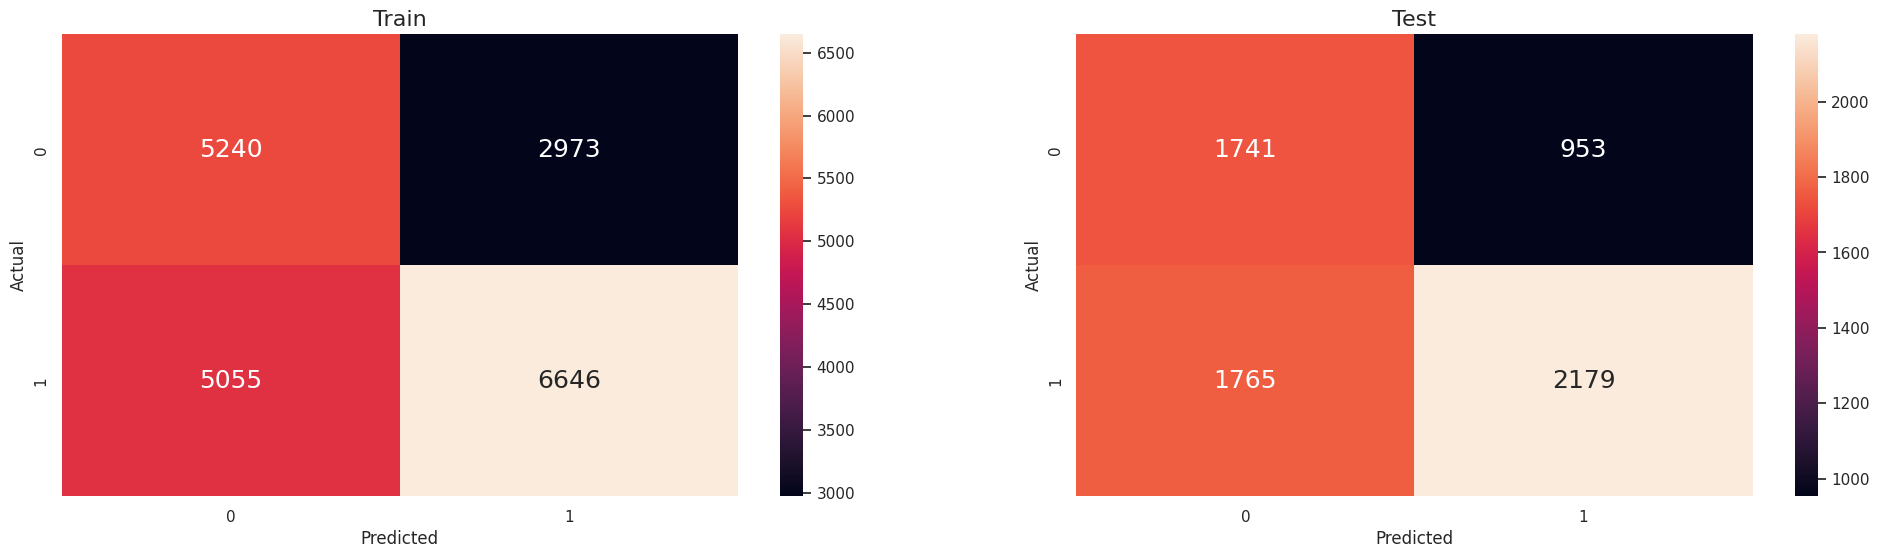

In [ ]:
nc_train_pred = nc4.predict(X_train4)
nc_test_pred = nc4.predict(X_test4)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", nc4.score(X_train4, y_train4), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", nc4.score(X_test4, y_test4), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train4, nc_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test4, nc_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

#### Random Forest Classifier

In [ ]:
rfc4 = RandomForestClassifier(n_estimators = 100)
rfc4.fit(X_train4, y_train4.values.ravel())

RandomForestClassifier()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6261424123732048 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6205182283820427 



Text(1280.7954545454543, 0.5, 'Actual')

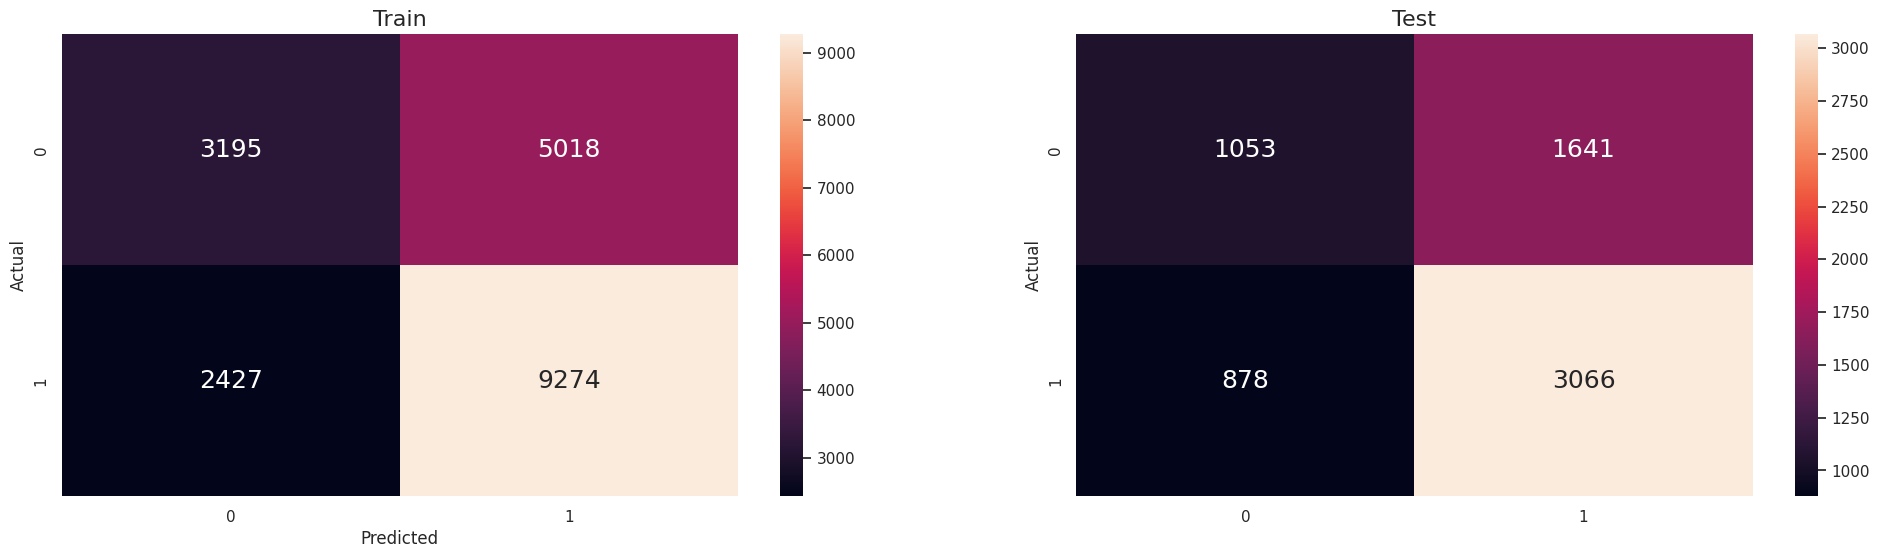

In [ ]:
rfc_train_pred = rfc4.predict(X_train4)
rfc_test_pred = rfc4.predict(X_test4)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc4.score(X_train4, y_train4), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc4.score(X_test4, y_test4), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train4, rfc_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test4, rfc_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")

## Analysis of Classification Trees

For all the 4 variables above, we fitted them with a decision tree classifier, a Logistic Regression classifier, Nearest Neighbour classifier and a Random Forest classifier. 

From the results, it seems that all the models seem to be similarly accurate, given the similar classification accuracy for all of the variable against home team wins. 

However, our team feel that the use of the nearest neighbour classifier is not so appropriate in our project case. Given that the classification accuracy is slightly lower as well in general across all variables, we will not be considering the nearest neighbour classifier in our analysis for the best variable to predict whether the home team wins.

Overall, the decision tree classifier seems to have a higher classification accuracy on average.

## OVERALL ANALYSIS AND FINAL CONCLUSION

As we can see with all the models, FG% is the most important feature in determining whether the home team wins. This is further corroborated by the fact that all the models have similar classification accuracies to each other for all the train and test data sets for each model, which suggest that efficiency is key in determining whether the home team wins or not. Moreover, given the similar and moderately high classification accuracies across all three models, given the large dataset, it can be concluded that all three models are equally good at predicting whether the home team wins or not.


The findings from these models suggest that efficiency is key to winning in the NBA. This could be employed by NBA scouts and general managers when it comes to scouting and selecting players during the draft. It could also help with roster construction as well as skill development as the aforementioned models suggest that efficient shooting is the key to winning. Moreover the three aforementioned models could be further improved upon by adding defensive statistics such as Opposing field goal percentage as well as other advanced statistics such as Box Plus Minus, Effective Field Goal Percentage, which could better help identify skill sets that could better help a team win.  Moreover, the models could take into account a team’s playstyle in order to help the team better find players suited to their playstyle.

Ultimately, we hope that our mini project can serve as an useful reference for NBA Teams to better improve their home games

# EXTRA models we explored

### Extra Classifier for FG PCT home



#### Support Vector Classification

##### RDF

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train.values.ravel())

SVC()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6958923370493121 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6901175052726725 



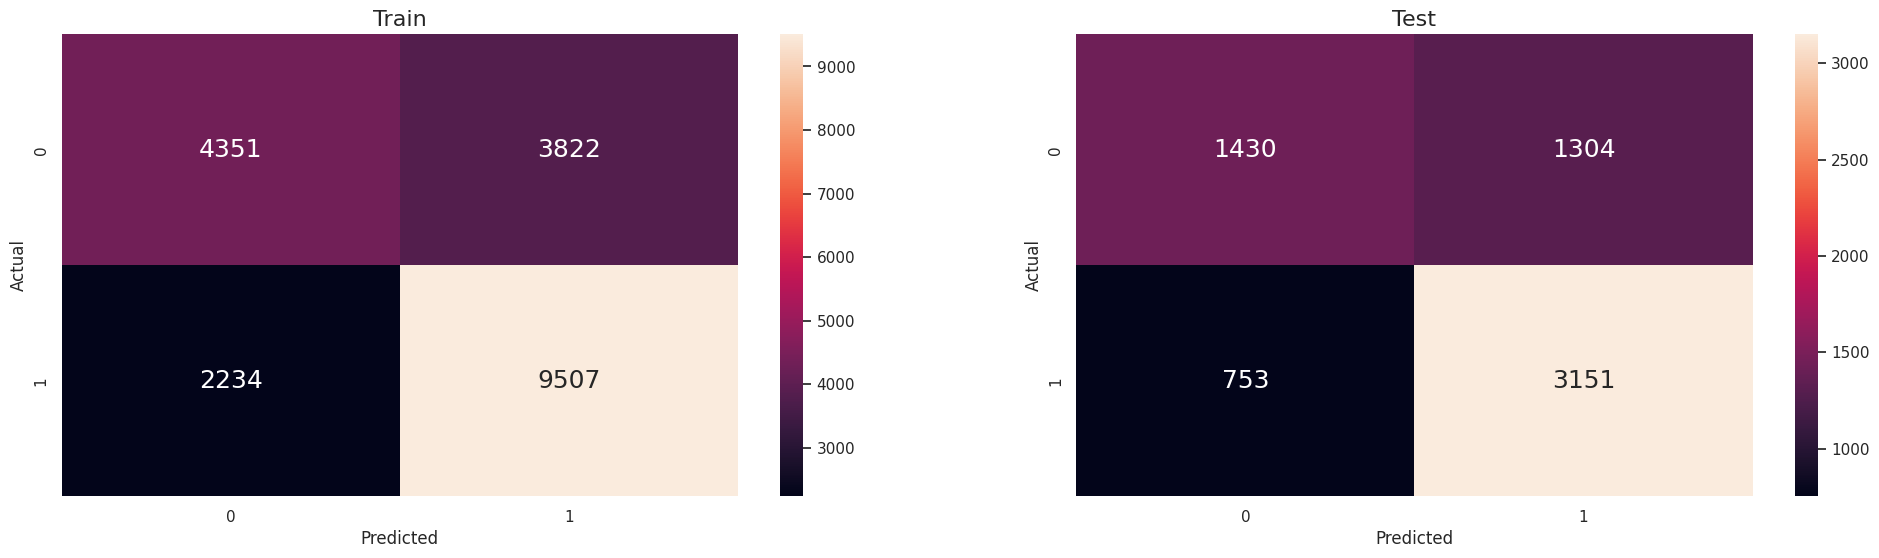

In [ ]:
clf_train_pred = clf.predict(X_train)
clf_test_pred = clf.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, clf_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, clf_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

plt.show()


##### Linear

In [ ]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train.values.ravel())

SVC(kernel='linear')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6944862910515216 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6899668574871949 



Text(0.5, 32.249999999999986, 'Predicted')

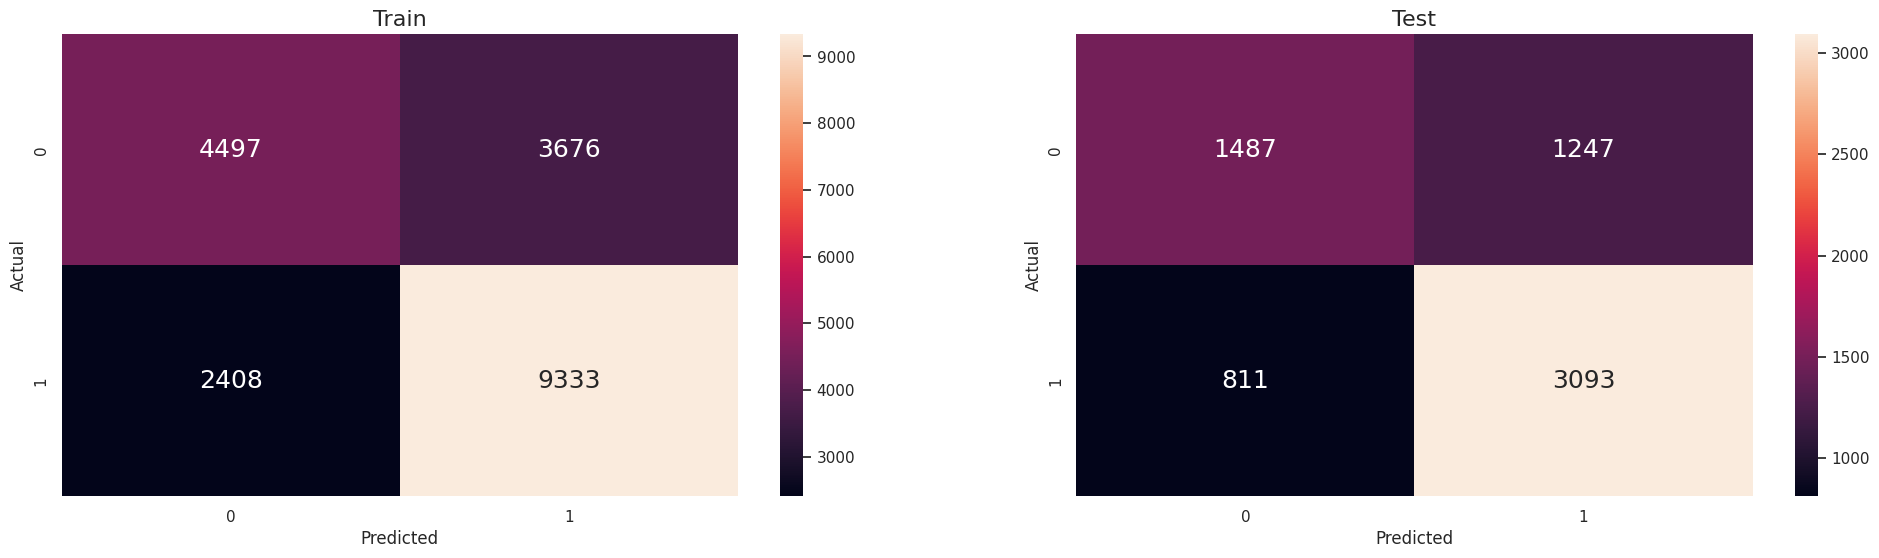

In [ ]:
clf_linear_train_pred = clf_linear.predict(X_train)
clf_linear_test_pred = clf_linear.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf_linear.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf_linear.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, clf_linear_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, clf_linear_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

##### Sigmoid

In [ ]:
clf_sigmoid = svm.SVC(kernel="sigmoid")
clf_sigmoid.fit(X_train, y_train.values.ravel())

SVC(kernel='sigmoid')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5895852164306518 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5881289545043688 



Text(0.5, 32.249999999999986, 'Predicted')

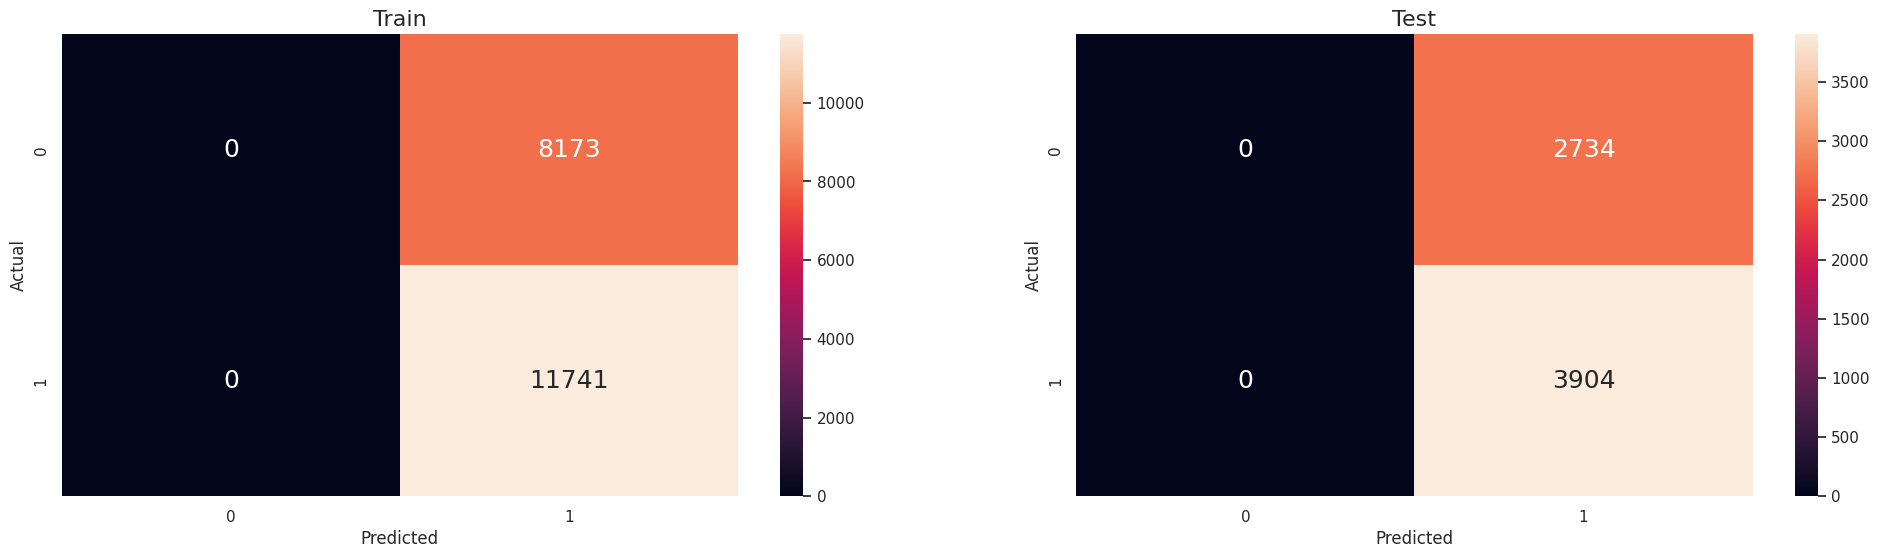

In [ ]:
clf_sigmoid_train_pred = clf_sigmoid.predict(X_train)
clf_sigmoid_test_pred = clf_sigmoid.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf_sigmoid.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf_sigmoid.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, clf_sigmoid_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, clf_sigmoid_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")